# Loading data

## The Mnist Data Set

In [327]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

In [336]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"



def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]




def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
    
    
    
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
num_train = 60000
    
X_train, X_test, y_train, y_test = X[:num_train], X[num_train:], y[:num_train], y[num_train:]


import numpy as np

shuffle_index = np.random.permutation(num_train)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Iris Data Set

In [351]:
iris = datasets.load_iris()
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [352]:
X = iris.data[:, 2:]
y = iris.target.astype(np.int)

In [353]:
num_train = 150  #edit this to change the training/validating set vs test set number

shuffle_index = np.random.permutation(X.shape[0])
X, y = X[shuffle_index], y[shuffle_index]

X_train, X_test, y_train, y_test = X[:num_train], X[num_train:], y[:num_train], y[num_train:]

## Model designing

In [442]:
def OneHotEncodeInt(y, n=None):
    if not n:
        n = y.max()+1
    encoded_y = np.zeros((y.shape[0], n))
    encoded_y[np.arange(y.shape[0]), y.astype(int)] = 1
    return np.array(encoded_y)

In [468]:
def Sigmoid(x):
    """
    I honestly dont know why I wrote this function
    """
    return 1 / (1 + np.exp(-x))

In [452]:
def SoftMax(Z):
    """
    The world, mudamudamudamuda
    """
    exp_Z = np.exp(Z)
    s = np.sum(exp_Z, axis=1, keepdims=True)
    return exp_Z/s

In [359]:
def CrossEntropy(y, y_pred):
    """
    omeriwa, sindeyilu.
    nani
    """
    return (-y*np.log(y_pred)).sum()/y.shape[0]

In [436]:
def SoftMaxGradient(X, y, y_pred):
    ncls = y.shape[1]
    n = X.shape[1]
    m = y.shape[0]
    d = np.zeros([ncls, n])
    for k in range(ncls):
        for i in range(m):
            d[k, :] += (y_pred[i][k] - y[i][k])*X[i]/m
    return d
#     X = np.dstack([X for i in range(y.shape[1])])
#     return ((np.swapaxes(X, 0, 1) * (y_pred - y)).sum(axis = 1)/y.shape[0]).T
#     The above is an alternative way to achieve the same goal via 3-D array

In [453]:
def BGDWtihEarlyStopping(X, y, features, learning_rate=0.05, t=50, bias=True):
    X = StandardScaler().fit_transform(X)

    if bias:
        X_b     = np.concatenate([np.ones(X.shape[0]).reshape(-1, 1), X], 1)
    else:
        X_b     = X
    theta_b = np.random.rand(features, X_b.shape[1]) + 1
    

    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5)
    train_index, test_index = next(sss.split(X_b, y))
    X_train, X_test = X_b[train_index], X_b[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_train = OneHotEncodeInt(y_train, features)
    y_test  = OneHotEncodeInt(y_test , features)

    loss_train_rec = []
    loss_test_rec = []
    best_theta_b = theta_b
    min_loss     = np.inf
    c            = 0
    i            = 0  
    while c < t:
        i += 1
        y_pred_train = SoftMax(X_train.dot(theta_b.T))
        y_pred_test = SoftMax(X_test.dot(theta_b.T))
        if X_train.dot(theta_b.T).any() > 10:
        loss_train = CrossEntropy(y_train, y_pred_train)
        loss_test = CrossEntropy(y_test, y_pred_test)
        loss_train_rec.append(loss_train)
        loss_test_rec.append(loss_test)
        if loss_test <= min_loss - 1e-5:
            best_theta_b = theta_b
            min_loss = loss_test
            c = 0
        else:
            c += 1
        dtheta_b = SoftMaxGradient(X_train, y_train, y_pred_train)
        theta_b -= learning_rate * dtheta_b
    plt.figure(figsize=(15, 15))
    plt.plot(range(1,i+1), loss_train_rec, "r-*", label="train loss")
    plt.plot(range(1,i+1), loss_test_rec, "b-o", label="test loss")
    plt.xlabel("Iterations")
    plt.ylabel("Losses")
    plt.legend(loc="best", fontsize=15)
    plt.axis([0, i, 0, max(max(loss_test_rec), max(loss_train_rec))])
    plt.show()
    return theta_b

##


In [392]:
theta_b = BGDWtihEarlyStopping(X_train[:2000], y_train[:2000], 10, 0.05)

1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0
185 

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score

In [348]:
std_X_test = StandardScaler().fit_transform(X_test)
std_X_test_b = np.concatenate([np.ones(std_X_test.shape[0]).reshape(-1, 1), std_X_test], 1)

y_pred_score = SoftMax(std_X_test_b.dot(theta_b.T))
y_pred = np.argmax(y_pred_score, axis=1).reshape(-1)
y_pred

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([0, 0, 0, ..., 9, 9, 4])

In [350]:
accuracy_score(y_test, y_pred)

0.61519999999999997

### Test Graph for iris set

theta_b= [[ 1.26531841  1.67642033]
 [ 1.59665403  1.10439386]
 [ 1.94370504  1.14802893]]
dtheta_b= [[ 0.44408357  0.42774784]
 [-0.16394864 -0.13464319]
 [-0.28013492 -0.29310464]]
1 0
theta_b= [[ 1.22091005  1.63364554]
 [ 1.6130489   1.11785818]
 [ 1.97171854  1.17733939]]
dtheta_b= [[ 0.41583891  0.40001753]
 [-0.15317894 -0.12413446]
 [-0.26265997 -0.27588307]]
2 0
theta_b= [[ 1.17932616  1.59364379]
 [ 1.62836679  1.13027163]
 [ 1.99798453  1.2049277 ]]
dtheta_b= [[ 0.38927836  0.37394823]
 [-0.14280673 -0.11404237]
 [-0.24647163 -0.25990586]]
3 0
theta_b= [[ 1.14039832  1.55624897]
 [ 1.64264747  1.14167587]
 [ 2.0226317   1.23091828]]
dtheta_b= [[ 0.36450998  0.3496521 ]
 [-0.13295296 -0.10448173]
 [-0.23155702 -0.24517037]]
4 0
theta_b= [[ 1.10394733  1.52128376]
 [ 1.65594276  1.15212404]
 [ 2.0457874   1.25543532]]
dtheta_b= [[ 0.34156456  0.32716134]
 [-0.12369686 -0.09552575]
 [-0.2178677  -0.23163558]]
5 0
theta_b= [[ 1.06979087  1.48856762]
 [ 1.66831245  1.16167661]
 [

97 0
theta_b= [[ 0.20160346  0.68473284]
 [ 1.97784028  1.26837017]
 [ 2.62623375  1.97574011]]
dtheta_b= [[ 0.03625046  0.0319197 ]
 [-0.01910068  0.00033454]
 [-0.01714977 -0.03225424]]
98 0
theta_b= [[ 0.19797841  0.68154087]
 [ 1.97975034  1.26833671]
 [ 2.62794872  1.97896554]]
dtheta_b= [[ 0.03588689  0.0315813 ]
 [-0.01904374  0.00036002]
 [-0.01684316 -0.03194132]]
99 0
theta_b= [[ 0.19438973  0.67838274]
 [ 1.98165472  1.26830071]
 [ 2.62963304  1.98215967]]
dtheta_b= [[ 0.03553031  0.03124951]
 [-0.01898749  0.00038507]
 [-0.01654282 -0.03163458]]
100 0
theta_b= [[ 0.19083669  0.67525779]
 [ 1.98355347  1.2682622 ]
 [ 2.63128732  1.98532313]]
dtheta_b= [[ 0.03518051  0.03092414]
 [-0.0189319   0.0004097 ]
 [-0.0162486  -0.03133385]]
101 0
theta_b= [[ 0.18731864  0.67216537]
 [ 1.98544666  1.26822123]
 [ 2.63291218  1.98845651]]
dtheta_b= [[ 0.03483729  0.03060502]
 [-0.01887695  0.00043394]
 [-0.01596034 -0.03103896]]
102 0
theta_b= [[ 0.18383491  0.66910487]
 [ 1.98733435  1

theta_b= [[-0.00679051  0.50452049]
 [ 2.11266646  1.25971309]
 [ 2.69980153  2.16460954]]
dtheta_b= [[ 0.02001559  0.01695321]
 [-0.0156622   0.00179026]
 [-0.00435339 -0.01874347]]
176 0
theta_b= [[-0.00879207  0.50282517]
 [ 2.11423268  1.25953407]
 [ 2.70023687  2.16648388]]
dtheta_b= [[ 0.01989835  0.01684651]
 [-0.01562544  0.00180541]
 [-0.00427291 -0.01865192]]
177 0
theta_b= [[-0.01078191  0.50114051]
 [ 2.11579523  1.25935353]
 [ 2.70066416  2.16834908]]
dtheta_b= [[ 0.0197824   0.016741  ]
 [-0.01558881  0.0018205 ]
 [-0.00419358 -0.0185615 ]]
178 0
theta_b= [[-0.01276015  0.49946641]
 [ 2.11735411  1.25917148]
 [ 2.70108352  2.17020523]]
dtheta_b= [[ 0.01966771  0.01663668]
 [-0.01555232  0.00183551]
 [-0.00411539 -0.01847219]]
179 0
theta_b= [[-0.01472692  0.49780275]
 [ 2.11890934  1.25898793]
 [ 2.70149506  2.17205245]]
dtheta_b= [[ 0.01955428  0.01653352]
 [-0.01551596  0.00185045]
 [-0.00403833 -0.01838397]]
180 0
theta_b= [[-0.01668235  0.49614939]
 [ 2.12046094  1.25

 [ 0.00099301 -0.01162904]]
324 0
theta_b= [[-0.21977576  0.3288246 ]
 [ 2.31185282  1.22021334]
 [ 2.71360043  2.37980518]]
dtheta_b= [[ 0.01041889  0.00833034]
 [-0.01142566  0.00327289]
 [ 0.00100677 -0.01160323]]
325 0
theta_b= [[-0.22081765  0.32799157]
 [ 2.31299538  1.21988605]
 [ 2.71349975  2.3809655 ]]
dtheta_b= [[ 0.01038379  0.00829934]
 [-0.01140418  0.00327822]
 [ 0.00102039 -0.01157756]]
326 0
theta_b= [[-0.22185603  0.32716164]
 [ 2.3141358   1.21955823]
 [ 2.71339771  2.38212326]]
dtheta_b= [[ 0.0103489   0.00826854]
 [-0.01138276  0.0032835 ]
 [ 0.00103386 -0.01155204]]
327 0
theta_b= [[-0.22289092  0.32633478]
 [ 2.31527408  1.21922988]
 [ 2.71329433  2.38327846]]
dtheta_b= [[ 0.01031421  0.00823792]
 [-0.01136142  0.00328874]
 [ 0.0010472  -0.01152665]]
328 0
theta_b= [[-0.22392234  0.32551099]
 [ 2.31641022  1.218901  ]
 [ 2.71318961  2.38443112]]
dtheta_b= [[ 0.01027974  0.00820749]
 [-0.01134014  0.00329392]
 [ 0.00106041 -0.01150141]]
329 0
theta_b= [[-0.2249503

443 0
theta_b= [[-0.32371107  0.24729784]
 [ 2.43447215  1.17864985]
 [ 2.6949164   2.50289542]]
dtheta_b= [[ 0.00733761  0.00563233]
 [-0.00929489  0.00363436]
 [ 0.00195728 -0.00926669]]
444 0
theta_b= [[-0.32444483  0.24673461]
 [ 2.43540164  1.17828642]
 [ 2.69472067  2.50382209]]
dtheta_b= [[ 0.00731859  0.00561584]
 [-0.00927999  0.00363558]
 [ 0.0019614  -0.00925142]]
445 0
theta_b= [[-0.32517669  0.24617302]
 [ 2.43632964  1.17792286]
 [ 2.69452453  2.50474723]]
dtheta_b= [[ 0.00729966  0.00559943]
 [-0.00926513  0.00363677]
 [ 0.00196547 -0.0092362 ]]
446 0
theta_b= [[-0.32590666  0.24561308]
 [ 2.43725615  1.17755918]
 [ 2.69432799  2.50567085]]
dtheta_b= [[ 0.00728082  0.0055831 ]
 [-0.00925031  0.00363794]
 [ 0.0019695  -0.00922104]]
447 0
theta_b= [[-0.32663474  0.24505477]
 [ 2.43818119  1.17719539]
 [ 2.69413104  2.50659296]]
dtheta_b= [[ 0.00726205  0.00556684]
 [-0.00923554  0.00363909]
 [ 0.00197349 -0.00920592]]
448 0
theta_b= [[-0.32736094  0.24449809]
 [ 2.43910474

theta_b= [[-0.37822116  0.20600175]
 [ 2.50607475  1.14862427]
 [ 2.67782389  2.5742171 ]]
dtheta_b= [[ 0.00601475  0.00449128]
 [-0.00819431  0.00366941]
 [ 0.00217955 -0.00816069]]
526 0
theta_b= [[-0.37882263  0.20555262]
 [ 2.50689418  1.14825733]
 [ 2.67760594  2.57503317]]
dtheta_b= [[ 0.00600112  0.00447959]
 [-0.00818223  0.00366916]
 [ 0.00218111 -0.00814875]]
527 0
theta_b= [[-0.37942275  0.20510466]
 [ 2.5077124   1.14789041]
 [ 2.67738783  2.57584804]]
dtheta_b= [[ 0.00598754  0.00446794]
 [-0.00817018  0.0036689 ]
 [ 0.00218265 -0.00813684]]
528 0
theta_b= [[-0.3800215   0.20465787]
 [ 2.50852942  1.14752352]
 [ 2.67716956  2.57666173]]
dtheta_b= [[ 0.00597401  0.00445634]
 [-0.00815817  0.00366863]
 [ 0.00218416 -0.00812496]]
529 0
theta_b= [[-0.3806189   0.20421223]
 [ 2.50934524  1.14715666]
 [ 2.67695115  2.57747422]]
dtheta_b= [[ 0.00596052  0.00444478]
 [-0.00814618  0.00366834]
 [ 0.00218565 -0.00811312]]
530 0
theta_b= [[-0.38121495  0.20376775]
 [ 2.51015985  1.14

 [ 0.00224249 -0.00677288]]
662 0
theta_b= [[-0.4497196   0.15377767]
 [ 2.60815242  1.09903959]
 [ 2.64724466  2.67602586]]
dtheta_b= [[ 0.00452523  0.00322299]
 [-0.00676739  0.00354112]
 [ 0.00224215 -0.00676412]]
663 0
theta_b= [[-0.45017212  0.15345537]
 [ 2.60882916  1.09868548]
 [ 2.64702045  2.67670227]]
dtheta_b= [[ 0.0045166   0.0032157 ]
 [-0.0067584   0.00353967]
 [ 0.00224181 -0.00675537]]
664 0
theta_b= [[-0.45062378  0.1531338 ]
 [ 2.609505    1.09833151]
 [ 2.64679627  2.67737781]]
dtheta_b= [[ 0.00450798  0.00320842]
 [-0.00674943  0.00353822]
 [ 0.00224145 -0.00674664]]
665 0
theta_b= [[-0.45107458  0.15281296]
 [ 2.61017994  1.09797769]
 [ 2.64657212  2.67805247]]
dtheta_b= [[ 0.0044994   0.00320117]
 [-0.00674048  0.00353676]
 [ 0.00224109 -0.00673793]]
666 0
theta_b= [[-0.45152452  0.15249284]
 [ 2.61085399  1.09762401]
 [ 2.64634801  2.67872627]]
dtheta_b= [[ 0.00449083  0.00319395]
 [-0.00673155  0.00353529]
 [ 0.00224072 -0.00672924]]
667 0
theta_b= [[-0.4519736

theta_b= [[-0.49518687  0.12201099]
 [ 2.67814508  1.06071435]
 [ 2.62271928  2.74611777]]
dtheta_b= [[ 0.00370194  0.00253128]
 [-0.00586655  0.00335539]
 [ 0.00216461 -0.00588667]]
774 0
theta_b= [[-0.49555707  0.12175787]
 [ 2.67873173  1.06037881]
 [ 2.62250282  2.74670644]]
dtheta_b= [[ 0.00369559  0.00252597]
 [-0.00585923  0.00335355]
 [ 0.00216363 -0.00587952]]
775 0
theta_b= [[-0.49592663  0.12150527]
 [ 2.67931766  1.06004346]
 [ 2.62228645  2.74729439]]
dtheta_b= [[ 0.00368926  0.00252069]
 [-0.00585192  0.0033517 ]
 [ 0.00216266 -0.00587239]]
776 0
theta_b= [[-0.49629555  0.1212532 ]
 [ 2.67990285  1.05970829]
 [ 2.62207019  2.74788163]]
dtheta_b= [[ 0.00368295  0.00251541]
 [-0.00584462  0.00334985]
 [ 0.00216168 -0.00586526]]
777 0
theta_b= [[-0.49666385  0.12100166]
 [ 2.68048731  1.0593733 ]
 [ 2.62185402  2.74846816]]
dtheta_b= [[ 0.00367665  0.00251015]
 [-0.00583734  0.003348  ]
 [ 0.00216069 -0.00585815]]
778 0
theta_b= [[-0.49703151  0.12075064]
 [ 2.68107105  1.05

980 0
theta_b= [[-0.5602967   0.079185  ]
 [ 2.78561256  0.99538869]
 [ 2.58036163  2.85426942]]
dtheta_b= [[ 0.0026669   0.00167364]
 [-0.00458158  0.0029492 ]
 [ 0.00191469 -0.00462285]]
981 0
theta_b= [[-0.56056339  0.07901764]
 [ 2.78607072  0.99509377]
 [ 2.58017016  2.8547317 ]]
dtheta_b= [[ 0.00266298  0.00167042]
 [-0.00457633  0.0029472 ]
 [ 0.00191335 -0.00461763]]
982 0
theta_b= [[-0.56082969  0.0788506 ]
 [ 2.78652835  0.99479905]
 [ 2.57997882  2.85519347]]
dtheta_b= [[ 0.00265907  0.00166722]
 [-0.00457109  0.0029452 ]
 [ 0.00191202 -0.00461242]]
983 0
theta_b= [[-0.5610956   0.07868388]
 [ 2.78698546  0.99450453]
 [ 2.57978762  2.85565471]]
dtheta_b= [[ 0.00265516  0.00166401]
 [-0.00456585  0.00294321]
 [ 0.00191068 -0.00460722]]
984 0
theta_b= [[-0.56136111  0.07851748]
 [ 2.78744204  0.99421021]
 [ 2.57959655  2.85611543]]
dtheta_b= [[ 0.00265127  0.00166082]
 [-0.00456062  0.00294121]
 [ 0.00190935 -0.00460202]]
985 0
theta_b= [[-0.56162624  0.07835139]
 [ 2.78789811

theta_b= [[-0.59083717  0.06055267]
 [ 2.83904517  0.96006152]
 [ 2.55746948  2.90822893]]
dtheta_b= [[ 0.00223424  0.00132007]
 [-0.00398082  0.00270255]
 [ 0.00174658 -0.00402262]]
1106 0
theta_b= [[-0.59106059  0.06042066]
 [ 2.83944325  0.95979126]
 [ 2.55729482  2.90863119]]
dtheta_b= [[ 0.0022312   0.0013176 ]
 [-0.00397643  0.00270061]
 [ 0.00174524 -0.00401821]]
1107 0
theta_b= [[-0.59128371  0.0602889 ]
 [ 2.83984089  0.9595212 ]
 [ 2.5571203   2.90903301]]
dtheta_b= [[ 0.00222815  0.00131512]
 [-0.00397205  0.00269868]
 [ 0.0017439  -0.0040138 ]]
1108 0
theta_b= [[-0.59150653  0.06015739]
 [ 2.8402381   0.95925133]
 [ 2.55694591  2.90943439]]
dtheta_b= [[ 0.00222512  0.00131265]
 [-0.00396767  0.00269674]
 [ 0.00174256 -0.0040094 ]]
1109 0
theta_b= [[-0.59172904  0.06002612]
 [ 2.84063487  0.95898166]
 [ 2.55677166  2.90983533]]
dtheta_b= [[ 0.00222209  0.00131019]
 [-0.0039633   0.00269481]
 [ 0.00174121 -0.004005  ]]
1110 0
theta_b= [[-0.59195125  0.05989511]
 [ 2.8410312  

theta_b= [[-0.61770856  0.04520319]
 [ 2.88766791  0.92627469]
 [ 2.53571813  2.95736524]]
dtheta_b= [[ 0.00187979  0.00103314]
 [-0.003454    0.00245648]
 [ 0.00157421 -0.00348962]]
1237 0
theta_b= [[-0.61789654  0.04509988]
 [ 2.88801331  0.92602904]
 [ 2.53556071  2.9577142 ]]
dtheta_b= [[ 0.0018774   0.00103122]
 [-0.00345033  0.00245466]
 [ 0.00157293 -0.00348588]]
1238 0
theta_b= [[-0.61808428  0.04499676]
 [ 2.88835835  0.92578357]
 [ 2.53540342  2.95806279]]
dtheta_b= [[ 0.00187501  0.00102929]
 [-0.00344665  0.00245285]
 [ 0.00157165 -0.00348214]]
1239 0
theta_b= [[-0.61827178  0.04489383]
 [ 2.88870301  0.92553829]
 [ 2.53524625  2.958411  ]]
dtheta_b= [[ 0.00187262  0.00102737]
 [-0.00344299  0.00245103]
 [ 0.00157037 -0.0034784 ]]
1240 0
theta_b= [[-0.61845904  0.04479109]
 [ 2.88904731  0.92529318]
 [ 2.53508921  2.95875884]]
dtheta_b= [[ 0.00187024  0.00102545]
 [-0.00343932  0.00244922]
 [ 0.00156909 -0.00347467]]
1241 0
theta_b= [[-0.61864606  0.04468855]
 [ 2.88939124 

1389 0
theta_b= [[-0.64391255  0.03144862]
 [ 2.93650392  0.89074027]
 [ 2.51308612  3.00665423]]
dtheta_b= [[ 0.0015574   0.00077478]
 [-0.00294307  0.00219101]
 [ 0.00138567 -0.00296579]]
1390 0
theta_b= [[-0.64406829  0.03137114]
 [ 2.93679823  0.89052116]
 [ 2.51294755  3.00695081]]
dtheta_b= [[ 0.00155555  0.00077331]
 [-0.00294004  0.00218936]
 [ 0.00138449 -0.00296267]]
1391 0
theta_b= [[-0.64422385  0.03129381]
 [ 2.93709223  0.89030223]
 [ 2.5128091   3.00724708]]
dtheta_b= [[ 0.0015537   0.00077184]
 [-0.00293702  0.00218771]
 [ 0.00138332 -0.00295955]]
1392 0
theta_b= [[-0.64437922  0.03121663]
 [ 2.93738593  0.89008346]
 [ 2.51267077  3.00754303]]
dtheta_b= [[ 0.00155186  0.00077037]
 [-0.002934    0.00218606]
 [ 0.00138214 -0.00295643]]
1393 0
theta_b= [[-0.64453441  0.03113959]
 [ 2.93767933  0.88986485]
 [ 2.51253256  3.00783868]]
dtheta_b= [[ 0.00155003  0.00076891]
 [-0.00293099  0.00218441]
 [ 0.00138096 -0.00295332]]
1394 0
theta_b= [[-0.64468941  0.0310627 ]
 [ 2.93

1542 0
theta_b= [[-0.66575611  0.02117048]
 [ 2.97822314  0.85907296]
 [ 2.49321046  3.04859967]]
dtheta_b= [[ 0.00130642  0.00057582]
 [-0.00252073  0.00195125]
 [ 0.00121431 -0.00252707]]
1543 0
theta_b= [[-0.66588675  0.0211129 ]
 [ 2.97847521  0.85887783]
 [ 2.49308903  3.04885238]]
dtheta_b= [[ 0.00130497  0.00057468]
 [-0.00251822  0.00194976]
 [ 0.00121325 -0.00252444]]
1544 0
theta_b= [[-0.66601725  0.02105543]
 [ 2.97872703  0.85868286]
 [ 2.4929677   3.04910483]]
dtheta_b= [[ 0.00130352  0.00057354]
 [-0.00251571  0.00194828]
 [ 0.00121219 -0.00252182]]
1545 0
theta_b= [[-0.6661476   0.02099808]
 [ 2.97897861  0.85848803]
 [ 2.49284648  3.04935701]]
dtheta_b= [[ 0.00130207  0.0005724 ]
 [-0.0025132   0.0019468 ]
 [ 0.00121113 -0.0025192 ]]
1546 0
theta_b= [[-0.66627781  0.02094084]
 [ 2.97922993  0.85829335]
 [ 2.49272537  3.04960893]]
dtheta_b= [[ 0.00130063  0.00057126]
 [-0.0025107   0.00194532]
 [ 0.00121007 -0.00251658]]
1547 0
theta_b= [[-0.66640787  0.02088372]
 [ 2.97

dtheta_b= [[ 0.00102557  0.00035621]
 [-0.0020174   0.00164056]
 [ 0.00099184 -0.00199677]]
1771 0
theta_b= [[-0.69227917  0.01064513]
 [ 3.02993339  0.81804924]
 [ 2.46802326  3.10014875]]
dtheta_b= [[ 0.00102453  0.00035541]
 [-0.00201547  0.00163931]
 [ 0.00099094 -0.00199472]]
1772 1
theta_b= [[-0.69238162  0.01060959]
 [ 3.03013494  0.81788531]
 [ 2.46792417  3.10034822]]
dtheta_b= [[ 0.00102349  0.00035461]
 [-0.00201354  0.00163807]
 [ 0.00099005 -0.00199267]]
1773 0
theta_b= [[-0.69248397  0.01057413]
 [ 3.03033629  0.8177215 ]
 [ 2.46782516  3.10054748]]
dtheta_b= [[ 0.00102245  0.0003538 ]
 [-0.00201162  0.00163682]
 [ 0.00098916 -0.00199063]]
1774 1
theta_b= [[-0.69258621  0.01053875]
 [ 3.03053745  0.81755782]
 [ 2.46772624  3.10074655]]
dtheta_b= [[ 0.00102142  0.000353  ]
 [-0.00200969  0.00163558]
 [ 0.00098827 -0.00198858]]
1775 0
theta_b= [[-0.69268836  0.01050345]
 [ 3.03073842  0.81739426]
 [ 2.46762742  3.10094541]]
dtheta_b= [[ 0.00102039  0.0003522 ]
 [-0.00200777

1935 0
theta_b= [[-0.70779361  0.00580976]
 [ 3.06055726  0.79276026]
 [ 2.45291384  3.1302731 ]]
dtheta_b= [[ 0.00087228  0.00023824]
 [-0.00172612  0.00144769]
 [ 0.00085383 -0.00168593]]
1936 1
theta_b= [[-0.70788084  0.00578594]
 [ 3.06072987  0.79261549]
 [ 2.45282845  3.13044169]]
dtheta_b= [[ 0.00087146  0.0002376 ]
 [-0.00172451  0.0014466 ]
 [ 0.00085305 -0.00168421]]
1937 0
theta_b= [[-0.70796799  0.00576218]
 [ 3.06090232  0.79247083]
 [ 2.45274315  3.13061011]]
dtheta_b= [[ 0.00087063  0.00023697]
 [-0.0017229   0.00144551]
 [ 0.00085227 -0.00168248]]
1938 1
theta_b= [[-0.70805505  0.00573848]
 [ 3.06107461  0.79232628]
 [ 2.45265792  3.13077836]]
dtheta_b= [[ 0.00086981  0.00023634]
 [-0.0017213   0.00144442]
 [ 0.00085149 -0.00168076]]
1939 0
theta_b= [[-0.70814203  0.00571484]
 [ 3.06124674  0.79218184]
 [ 2.45257277  3.13094643]]
dtheta_b= [[ 0.00086898  0.00023571]
 [-0.00171969  0.00144333]
 [ 0.00085071 -0.00167904]]
1940 1
theta_b= [[-0.70822893  0.00569127]
 [ 3.06

 [ 2.4456925   3.14446785]]
dtheta_b= [[ 0.00080355  0.00018592]
 [-0.00159097  0.00135476]
 [ 0.00078742 -0.00154069]]
2024 1
theta_b= [[-0.71524517  0.00392706]
 [ 3.07530889  0.78029414]
 [ 2.44561376  3.14462191]]
dtheta_b= [[ 0.00080282  0.00018537]
 [-0.00158951  0.00135375]
 [ 0.00078669 -0.00153911]]
2025 0
theta_b= [[-0.71532545  0.00390852]
 [ 3.07546784  0.78015877]
 [ 2.44553509  3.14477583]]
dtheta_b= [[ 0.00080208  0.00018481]
 [-0.00158804  0.00135273]
 [ 0.00078596 -0.00153754]]
2026 1
theta_b= [[-0.71540566  0.00389004]
 [ 3.07562665  0.78002349]
 [ 2.4454565   3.14492958]]
dtheta_b= [[ 0.00080135  0.00018425]
 [-0.00158658  0.00135171]
 [ 0.00078524 -0.00153596]]
2027 0
theta_b= [[-0.71548579  0.00387162]
 [ 3.0757853   0.77988832]
 [ 2.44537797  3.14508318]]
dtheta_b= [[ 0.00080061  0.0001837 ]
 [-0.00158513  0.00135069]
 [ 0.00078451 -0.00153439]]
2028 1
theta_b= [[-0.71556585  0.00385325]
 [ 3.07594382  0.77975325]
 [ 2.44529952  3.14523661]]
dtheta_b= [[ 0.0007998

2139 0
theta_b= [[ -7.24018827e-01   2.14177692e-03]
 [  3.09266733e+00   7.65373378e-01]
 [  2.43702899e+00   3.16132796e+00]]
dtheta_b= [[ 0.00072432  0.00012619]
 [-0.00143119  0.00124193]
 [ 0.00070688 -0.00136813]]
2140 1
theta_b= [[ -7.24091259e-01   2.12915762e-03]
 [  3.09281045e+00   7.65249184e-01]
 [  2.43695830e+00   3.16146477e+00]]
dtheta_b= [[ 0.00072368  0.00012572]
 [-0.0014299   0.00124101]
 [ 0.00070622 -0.00136673]]
2141 0
theta_b= [[ -7.24163627e-01   2.11658571e-03]
 [  3.09295344e+00   7.65125083e-01]
 [  2.43688768e+00   3.16160145e+00]]
dtheta_b= [[ 0.00072305  0.00012525]
 [-0.00142861  0.00124008]
 [ 0.00070556 -0.00136533]]
2142 1
theta_b= [[ -7.24235932e-01   2.10406114e-03]
 [  3.09309630e+00   7.65001075e-01]
 [  2.43681712e+00   3.16173798e+00]]
dtheta_b= [[ 0.00072242  0.00012477]
 [-0.00142732  0.00123915]
 [ 0.0007049  -0.00136393]]
2143 0
theta_b= [[ -7.24308174e-01   2.09158383e-03]
 [  3.09323903e+00   7.64877160e-01]
 [  2.43674663e+00   3.1618743

dtheta_b= [[  6.77903809e-04   9.15533858e-05]
 [ -1.33542326e-03   1.17269905e-03]
 [  6.57519453e-04  -1.26425244e-03]]
2217 0
theta_b= [[ -7.29484554e-01   1.29493307e-03]
 [  3.10345219e+00   7.55959093e-01]
 [  2.43170985e+00   3.17158909e+00]]
dtheta_b= [[  6.77330498e-04   9.11273158e-05]
 [ -1.33422941e-03   1.17182816e-03]
 [  6.56898909e-04  -1.26295547e-03]]
2218 1
theta_b= [[ -7.29552287e-01   1.28582034e-03]
 [  3.10358561e+00   7.55841910e-01]
 [  2.43164416e+00   3.17171539e+00]]
dtheta_b= [[  6.76757913e-04   9.07018321e-05]
 [ -1.33303679e-03   1.17095797e-03]
 [  6.56278879e-04  -1.26165980e-03]]
2219 0
theta_b= [[ -7.29619963e-01   1.27675015e-03]
 [  3.10371891e+00   7.55724814e-01]
 [  2.43157853e+00   3.17184155e+00]]
dtheta_b= [[  6.76186053e-04   9.02769339e-05]
 [ -1.33184542e-03   1.17008849e-03]
 [  6.55659363e-04  -1.26036543e-03]]
2220 1
theta_b= [[ -7.29687582e-01   1.26772246e-03]
 [  3.10385210e+00   7.55607805e-01]
 [  2.43151297e+00   3.17196759e+00]]


dtheta_b= [[  6.17973619e-04   4.72885832e-05]
 [ -1.20909866e-03   1.07944647e-03]
 [  5.91125039e-04  -1.12673505e-03]]
2329 2
theta_b= [[ -7.36730621e-01   5.25964760e-04]
 [  3.11768158e+00   7.43359699e-01]
 [  2.42472653e+00   3.18495745e+00]]
dtheta_b= [[  6.17475398e-04   4.69230939e-05]
 [ -1.20803504e-03   1.07865170e-03]
 [  5.90559641e-04  -1.12557479e-03]]
2330 0
theta_b= [[ -7.36792368e-01   5.21272451e-04]
 [  3.11780238e+00   7.43251834e-01]
 [  2.42466747e+00   3.18507001e+00]]
dtheta_b= [[  6.16977795e-04   4.65581021e-05]
 [ -1.20697251e-03   1.07785757e-03]
 [  5.89994713e-04  -1.12441568e-03]]
2331 1
theta_b= [[ -7.36854066e-01   5.16616640e-04]
 [  3.11792308e+00   7.43144049e-01]
 [  2.42460847e+00   3.18518245e+00]]
dtheta_b= [[  6.16480809e-04   4.61936072e-05]
 [ -1.20591106e-03   1.07706410e-03]
 [  5.89430256e-04  -1.12325771e-03]]
2332 2
theta_b= [[ -7.36915714e-01   5.11997280e-04]
 [  3.11804367e+00   7.43036342e-01]
 [  2.42454953e+00   3.18529478e+00]]


2434 2
theta_b= [[ -7.42953577e-01   2.23575583e-04]
 [  3.12980559e+00   7.32455525e-01]
 [  2.41882547e+00   3.19616402e+00]]
dtheta_b= [[  5.68436924e-04   1.11828241e-05]
 [ -1.10217598e-03   9.98717030e-04]
 [  5.33739056e-04  -1.00989985e-03]]
2435 0
theta_b= [[ -7.43010421e-01   2.22457300e-04]
 [  3.12991581e+00   7.32355654e-01]
 [  2.41877210e+00   3.19626501e+00]]
dtheta_b= [[  5.67999557e-04   1.08663013e-05]
 [ -1.10122102e-03   9.97988290e-04]
 [  5.33221465e-04  -1.00885459e-03]]
2436 1
theta_b= [[ -7.43067221e-01   2.21370670e-04]
 [  3.13002593e+00   7.32255855e-01]
 [  2.41871877e+00   3.19636589e+00]]
dtheta_b= [[  5.67562721e-04   1.05502061e-05]
 [ -1.10026703e-03   9.97260146e-04]
 [  5.32704306e-04  -1.00781035e-03]]
2437 2
theta_b= [[ -7.43123977e-01   2.20315650e-04]
 [  3.13013596e+00   7.32156129e-01]
 [  2.41866550e+00   3.19646667e+00]]
dtheta_b= [[  5.67126417e-04   1.02345381e-05]
 [ -1.09931400e-03   9.96532598e-04]
 [  5.32187579e-04  -1.00676714e-03]]


theta_b= [[ -7.46125393e-01   2.09122349e-04]
 [  3.13593836e+00   7.26877419e-01]
 [  2.41586452e+00   3.20175658e+00]]
dtheta_b= [[  5.44335321e-04  -6.19354327e-06]
 [ -1.04925045e-03   9.58116707e-04]
 [  5.04915131e-04  -9.51923163e-04]]
2492 0
theta_b= [[ -7.46179826e-01   2.09741703e-04]
 [  3.13604329e+00   7.26781607e-01]
 [  2.41581402e+00   3.20185177e+00]]
dtheta_b= [[  5.43927149e-04  -6.48661783e-06]
 [ -1.04834874e-03   9.57421201e-04]
 [  5.04421590e-04  -9.50934583e-04]]
2493 1
theta_b= [[ -7.46234219e-01   2.10390365e-04]
 [  3.13614812e+00   7.26685865e-01]
 [  2.41576358e+00   3.20194686e+00]]
dtheta_b= [[  5.43519469e-04  -6.77929745e-06]
 [ -1.04744793e-03   9.56726264e-04]
 [  5.03928462e-04  -9.49946966e-04]]
2494 2
theta_b= [[ -7.46288571e-01   2.11068294e-04]
 [  3.13625287e+00   7.26590193e-01]
 [  2.41571319e+00   3.20204186e+00]]
dtheta_b= [[  5.43112280e-04  -7.07158269e-06]
 [ -1.04654803e-03   9.56031896e-04]
 [  5.03435745e-04  -9.48960313e-04]]
2495 0


 [  2.41339960e+00   3.20639696e+00]]
dtheta_b= [[  5.24516539e-04  -2.03740352e-05]
 [ -1.00525275e-03   9.24029884e-04]
 [  4.80736214e-04  -9.03655849e-04]]
2542 2
theta_b= [[ -7.48850469e-01   2.77267486e-04]
 [  3.14117643e+00   7.22078527e-01]
 [  2.41335152e+00   3.20648732e+00]]
dtheta_b= [[  5.24132166e-04  -2.06480186e-05]
 [ -1.00439503e-03   9.23362285e-04]
 [  4.80262863e-04  -9.02714267e-04]]
2543 0
theta_b= [[ -7.48902882e-01   2.79332288e-04]
 [  3.14127687e+00   7.21986190e-01]
 [  2.41330350e+00   3.20657759e+00]]
dtheta_b= [[  5.23748252e-04  -2.09216334e-05]
 [ -1.00353816e-03   9.22695233e-04]
 [  4.79789907e-04  -9.01773600e-04]]
2544 1
theta_b= [[ -7.48955257e-01   2.81424451e-04]
 [  3.14137722e+00   7.21893921e-01]
 [  2.41325552e+00   3.20666777e+00]]
dtheta_b= [[  5.23364798e-04  -2.11948803e-05]
 [ -1.00268214e-03   9.22028727e-04]
 [  4.79317347e-04  -9.00833847e-04]]
2545 2
theta_b= [[ -7.49007593e-01   2.83543939e-04]
 [  3.14147749e+00   7.21801718e-01]


2602 2
theta_b= [[ -7.51928850e-01   4.48350311e-04]
 [  3.14705401e+00   7.16654574e-01]
 [  2.41055232e+00   3.21174019e+00]]
dtheta_b= [[  5.01889078e-04  -3.64304524e-05]
 [ -9.54462830e-04   8.84290677e-04]
 [  4.52573752e-04  -8.47860225e-04]]
2603 0
theta_b= [[ -7.51979039e-01   4.51993356e-04]
 [  3.14714946e+00   7.16566145e-01]
 [  2.41050707e+00   3.21182498e+00]]
dtheta_b= [[  5.01531640e-04  -3.66828553e-05]
 [ -9.53655571e-04   8.83655613e-04]
 [  4.52123931e-04  -8.46972757e-04]]
2604 1
theta_b= [[ -7.52029192e-01   4.55661642e-04]
 [  3.14724482e+00   7.16477779e-01]
 [  2.41046185e+00   3.21190968e+00]]
dtheta_b= [[  5.01174626e-04  -3.69349193e-05]
 [ -9.52849113e-04   8.83021068e-04]
 [  4.51674487e-04  -8.46086149e-04]]
2605 2
theta_b= [[ -7.52079310e-01   4.59355134e-04]
 [  3.14734011e+00   7.16389477e-01]
 [  2.41041669e+00   3.21199428e+00]]
dtheta_b= [[  5.00818034e-04  -3.71866447e-05]
 [ -9.52043452e-04   8.82387043e-04]
 [  4.51225418e-04  -8.45200399e-04]]


dtheta_b= [[  4.79512146e-04  -5.21511706e-05]
 [ -9.03616151e-04   8.44074399e-04]
 [  4.24104005e-04  -7.91923229e-04]]
2668 2
theta_b= [[ -7.55166545e-01   7.41413027e-04]
 [  3.15318390e+00   7.10952128e-01]
 [  2.40766013e+00   3.21714958e+00]]
dtheta_b= [[  4.79181089e-04  -5.23824666e-05]
 [ -9.02859074e-04   8.43472252e-04]
 [  4.23677986e-04  -7.91089786e-04]]
2669 0
theta_b= [[ -7.55214463e-01   7.46651274e-04]
 [  3.15327419e+00   7.10867781e-01]
 [  2.40761776e+00   3.21722868e+00]]
dtheta_b= [[  4.78850420e-04  -5.26134521e-05]
 [ -9.02102742e-04   8.42870598e-04]
 [  4.23252323e-04  -7.90257146e-04]]
2670 1
theta_b= [[ -7.55262348e-01   7.51912619e-04]
 [  3.15336440e+00   7.10783494e-01]
 [  2.40757543e+00   3.21730771e+00]]
dtheta_b= [[  4.78520138e-04  -5.28441275e-05]
 [ -9.01347154e-04   8.42269436e-04]
 [  4.22827016e-04  -7.89425309e-04]]
2671 2
theta_b= [[ -7.55310200e-01   7.57197032e-04]
 [  3.15345453e+00   7.10699267e-01]
 [  2.40753315e+00   3.21738665e+00]]


 [  2.40507269e+00   3.22197396e+00]]
dtheta_b= [[  4.59086418e-04  -6.63451928e-05]
 [ -8.56631245e-04   8.06513653e-04]
 [  3.97544827e-04  -7.40168460e-04]]
2732 1
theta_b= [[ -7.58168225e-01   1.12196168e-03]
 [  3.15881277e+00   7.05673174e-01]
 [  2.40503294e+00   3.22204798e+00]]
dtheta_b= [[  4.58779209e-04  -6.65574341e-05]
 [ -8.55920231e-04   8.05942236e-04]
 [  3.97141022e-04  -7.39384802e-04]]
2733 2
theta_b= [[ -7.58214103e-01   1.12861742e-03]
 [  3.15889837e+00   7.05592579e-01]
 [  2.40499322e+00   3.22212192e+00]]
dtheta_b= [[  4.58472357e-04  -6.67693904e-05]
 [ -8.55209913e-04   8.05371287e-04]
 [  3.96737556e-04  -7.38601896e-04]]
2734 3
theta_b= [[ -7.58259950e-01   1.13529436e-03]
 [  3.15898389e+00   7.05512042e-01]
 [  2.40495355e+00   3.22219578e+00]]
dtheta_b= [[  4.58165862e-04  -6.69810621e-05]
 [ -8.54500289e-04   8.04800804e-04]
 [  3.96334426e-04  -7.37819742e-04]]
2735 0
theta_b= [[ -7.58305767e-01   1.14199247e-03]
 [  3.15906934e+00   7.05431562e-01]


 [  3.64024170e-04  -6.75447183e-04]]
2818 3
theta_b= [[ -7.62005124e-01   1.76899130e-03]
 [  3.16592101e+00   6.98946054e-01]
 [  2.40176159e+00   3.22812807e+00]]
dtheta_b= [[  4.33646639e-04  -8.37829578e-05]
 [ -7.97295056e-04   7.58508474e-04]
 [  3.63648416e-04  -6.74725516e-04]]
2819 0
theta_b= [[ -7.62048488e-01   1.77736959e-03]
 [  3.16600074e+00   6.98870204e-01]
 [  2.40172523e+00   3.22819554e+00]]
dtheta_b= [[  4.33368810e-04  -8.39717643e-05]
 [ -7.96641787e-04   7.57976303e-04]
 [  3.63272977e-04  -6.74004539e-04]]
2820 1
theta_b= [[ -7.62091825e-01   1.78576677e-03]
 [  3.16608041e+00   6.98794406e-01]
 [  2.40168890e+00   3.22826294e+00]]
dtheta_b= [[  4.33091299e-04  -8.41603167e-05]
 [ -7.95989151e-04   7.57444567e-04]
 [  3.62897853e-04  -6.73284250e-04]]
2821 2
theta_b= [[ -7.62135134e-01   1.79418280e-03]
 [  3.16616001e+00   6.98718661e-01]
 [  2.40165261e+00   3.22833027e+00]]
dtheta_b= [[  4.32814106e-04  -8.43486154e-05]
 [ -7.95337148e-04   7.56913265e-04]


2865 2
theta_b= [[ -7.64013739e-01   2.18277512e-03]
 [  3.16959870e+00   6.95437893e-01]
 [  2.40009253e+00   3.23122245e+00]]
dtheta_b= [[  4.20926681e-04  -9.23875625e-05]
 [ -7.67264992e-04   7.33960713e-04]
 [  3.46338311e-04  -6.41573151e-04]]
2866 3
theta_b= [[ -7.64055832e-01   2.19201388e-03]
 [  3.16967542e+00   6.95364497e-01]
 [  2.40005789e+00   3.23128661e+00]]
dtheta_b= [[  4.20663399e-04  -9.25647816e-05]
 [ -7.66640762e-04   7.33448595e-04]
 [  3.45977364e-04  -6.40883813e-04]]
2867 0
theta_b= [[ -7.64097898e-01   2.20127035e-03]
 [  3.16975209e+00   6.95291153e-01]
 [  2.40002330e+00   3.23135069e+00]]
dtheta_b= [[  4.20400417e-04  -9.27417618e-05]
 [ -7.66017135e-04   7.32936895e-04]
 [  3.45616719e-04  -6.40195133e-04]]
2868 1
theta_b= [[ -7.64139938e-01   2.21054453e-03]
 [  3.16982869e+00   6.95217859e-01]
 [  2.39998873e+00   3.23141471e+00]]
dtheta_b= [[  4.20137734e-04  -9.29185034e-05]
 [ -7.65394110e-04   7.32425612e-04]
 [  3.45256376e-04  -6.39507109e-04]]


theta_b= [[ -7.65512700e-01   2.52636640e-03]
 [  3.17232195e+00   6.92827602e-01]
 [  2.39886823e+00   3.23348915e+00]]
dtheta_b= [[  4.11634862e-04  -9.86191475e-05]
 [ -7.45167688e-04   7.15785453e-04]
 [  3.33532827e-04  -6.17166306e-04]]
2902 3
theta_b= [[ -7.65553864e-01   2.53622831e-03]
 [  3.17239647e+00   6.92756023e-01]
 [  2.39883488e+00   3.23355086e+00]]
dtheta_b= [[  4.11382144e-04  -9.87879596e-05]
 [ -7.44564746e-04   7.15288173e-04]
 [  3.33182602e-04  -6.16500214e-04]]
2903 0
theta_b= [[ -7.65595002e-01   2.54610711e-03]
 [  3.17247092e+00   6.92684494e-01]
 [  2.39880156e+00   3.23361251e+00]]
dtheta_b= [[  4.11129713e-04  -9.89565437e-05]
 [ -7.43962385e-04   7.14791299e-04]
 [  3.32832672e-04  -6.15834756e-04]]
2904 1
theta_b= [[ -7.65636115e-01   2.55600276e-03]
 [  3.17254532e+00   6.92613015e-01]
 [  2.39876828e+00   3.23367410e+00]]
dtheta_b= [[  4.10877568e-04  -9.91249002e-05]
 [ -7.43360602e-04   7.14294831e-04]
 [  3.32483034e-04  -6.15169930e-04]]
2905 2


dtheta_b= [[ 0.00038481 -0.00011632]
 [-0.00068057  0.00066208]
 [ 0.00029576 -0.00054576]]
3015 0
theta_b= [[-0.77004922  0.00375407]
 [ 3.18044206  0.68497841]
 [ 2.39528465  3.24011064]]
dtheta_b= [[ 0.00038459 -0.00011646]
 [-0.00068003  0.00066163]
 [ 0.00029544 -0.00054517]]
3016 1
theta_b= [[-0.77008768  0.00376571]
 [ 3.18051006  0.68491224]
 [ 2.3952551   3.24016516]]
dtheta_b= [[ 0.00038436 -0.00011661]
 [-0.00067948  0.00066118]
 [ 0.00029512 -0.00054457]]
3017 2
theta_b= [[-0.77012611  0.00377737]
 [ 3.18057801  0.68484613]
 [ 2.39522559  3.24021962]]
dtheta_b= [[ 0.00038414 -0.00011675]
 [-0.00067894  0.00066072]
 [ 0.0002948  -0.00054397]]
3018 3
theta_b= [[-0.77016453  0.00378905]
 [ 3.1806459   0.68478005]
 [ 2.39519611  3.24027401]]
dtheta_b= [[ 0.00038392 -0.0001169 ]
 [-0.00067841  0.00066027]
 [ 0.00029449 -0.00054338]]
3019 0
theta_b= [[-0.77020292  0.00380074]
 [ 3.18071374  0.68471403]
 [ 2.39516666  3.24032835]]
dtheta_b= [[ 0.0003837  -0.00011704]
 [-0.00067787

 [ 2.39315541  3.24403727]]
dtheta_b= [[ 0.00036858 -0.00012678]
 [-0.00064087  0.00062865]
 [ 0.00027229 -0.00050187]]
3091 4
theta_b= [[-0.77291043  0.00467906]
 [ 3.18545973  0.6800766 ]
 [ 2.39312818  3.24408746]]
dtheta_b= [[ 0.00036838 -0.00012691]
 [-0.00064037  0.00062822]
 [ 0.00027199 -0.00050131]]
3092 0
theta_b= [[-0.77294727  0.00469175]
 [ 3.18552377  0.68001378]
 [ 2.39310098  3.24413759]]
dtheta_b= [[ 0.00036817 -0.00012704]
 [-0.00063987  0.0006278 ]
 [ 0.00027169 -0.00050076]]
3093 1
theta_b= [[-0.77298408  0.00470446]
 [ 3.18558776  0.679951  ]
 [ 2.39307381  3.24418767]]
dtheta_b= [[ 0.00036797 -0.00012717]
 [-0.00063937  0.00062737]
 [ 0.0002714  -0.0005002 ]]
3094 2
theta_b= [[-0.77302088  0.00471717]
 [ 3.18565169  0.67988826]
 [ 2.39304667  3.24423769]]
dtheta_b= [[ 0.00036777 -0.0001273 ]
 [-0.00063886  0.00062695]
 [ 0.0002711  -0.00049964]]
3095 3
theta_b= [[-0.77305766  0.0047299 ]
 [ 3.18571558  0.67982556]
 [ 2.39301956  3.24428765]]
dtheta_b= [[ 0.0003675

theta_b= [[-0.77832168  0.00676243]
 [ 3.19469941  0.67094036]
 [ 2.38929975  3.25114032]]
dtheta_b= [[ 0.00033959 -0.00014491]
 [-0.00056868  0.00056692]
 [ 0.00022909 -0.00042202]]
3245 3
theta_b= [[-0.77835564  0.00677692]
 [ 3.19475628  0.67088367]
 [ 2.38927684  3.25118252]]
dtheta_b= [[ 0.00033942 -0.00014501]
 [-0.00056825  0.00056655]
 [ 0.00022883 -0.00042154]]
3246 4
theta_b= [[-0.77838958  0.00679142]
 [ 3.19481311  0.67082702]
 [ 2.38925396  3.25122468]]
dtheta_b= [[ 0.00033924 -0.00014512]
 [-0.00056781  0.00056617]
 [ 0.00022857 -0.00042105]]
3247 0
theta_b= [[-0.7784235   0.00680593]
 [ 3.19486989  0.6707704 ]
 [ 2.3892311   3.25126678]]
dtheta_b= [[ 0.00033907 -0.00014522]
 [-0.00056738  0.0005658 ]
 [ 0.00022831 -0.00042057]]
3248 1
theta_b= [[-0.77845741  0.00682046]
 [ 3.19492663  0.67071382]
 [ 2.38920827  3.25130884]]
dtheta_b= [[ 0.0003389  -0.00014533]
 [-0.00056694  0.00056542]
 [ 0.00022804 -0.00042009]]
3249 2
theta_b= [[-0.7784913   0.00683499]
 [ 3.19498332 

3317 0
theta_b= [[-0.78075639  0.00784708]
 [ 3.19873884  0.66689879]
 [ 2.38769504  3.25409724]]
dtheta_b= [[ 0.00032745 -0.00015223]
 [-0.00053794  0.00054025]
 [ 0.00021049 -0.00038802]]
3318 1
theta_b= [[-0.78078914  0.0078623 ]
 [ 3.19879263  0.66684477]
 [ 2.38767399  3.25413604]]
dtheta_b= [[ 0.00032729 -0.00015233]
 [-0.00053753  0.0005399 ]
 [ 0.00021024 -0.00038757]]
3319 2
theta_b= [[-0.78082187  0.00787754]
 [ 3.19884638  0.66679078]
 [ 2.38765297  3.2541748 ]]
dtheta_b= [[ 0.00032713 -0.00015242]
 [-0.00053712  0.00053954]
 [ 0.00020999 -0.00038712]]
3320 3
theta_b= [[-0.78085458  0.00789278]
 [ 3.1989001   0.66673683]
 [ 2.38763197  3.25421351]]
dtheta_b= [[ 0.00032697 -0.00015252]
 [-0.00053672  0.00053919]
 [ 0.00020975 -0.00038667]]
3321 4
theta_b= [[-0.78088728  0.00790803]
 [ 3.19895377  0.66668291]
 [ 2.38761099  3.25425218]]
dtheta_b= [[ 0.00032681 -0.00015261]
 [-0.00053631  0.00053884]
 [ 0.0002095  -0.00038622]]
3322 0
theta_b= [[-0.78091996  0.00792329]
 [ 3.19

dtheta_b= [[ 0.00029915 -0.00016852]
 [-0.00046499  0.00047597]
 [ 0.00016584 -0.00030746]]
3514 0
theta_b= [[-0.78691888  0.01101396]
 [ 3.20859612  0.6569056 ]
 [ 2.38400025  3.26092356]]
dtheta_b= [[ 0.00029902 -0.00016859]
 [-0.00046465  0.00047567]
 [ 0.00016563 -0.00030708]]
3515 1
theta_b= [[-0.78694878  0.01103082]
 [ 3.20864258  0.65685804]
 [ 2.38398369  3.26095426]]
dtheta_b= [[ 0.00029889 -0.00016866]
 [-0.00046431  0.00047537]
 [ 0.00016542 -0.00030671]]
3516 2
theta_b= [[-0.78697867  0.01104768]
 [ 3.20868901  0.6568105 ]
 [ 2.38396714  3.26098494]]
dtheta_b= [[ 0.00029876 -0.00016873]
 [-0.00046397  0.00047507]
 [ 0.00016521 -0.00030633]]
3517 3
theta_b= [[-0.78700855  0.01106455]
 [ 3.20873541  0.65676299]
 [ 2.38395062  3.26101557]]
dtheta_b= [[ 0.00029863 -0.0001688 ]
 [-0.00046364  0.00047476]
 [ 0.000165   -0.00030596]]
3518 4
theta_b= [[-0.78703841  0.01108144]
 [ 3.20878177  0.65671552]
 [ 2.38393412  3.26104616]]
dtheta_b= [[ 0.0002985  -0.00016887]
 [-0.0004633 

3667 6
theta_b= [[-0.79135051  0.01367081]
 [ 3.21532859  0.64996557]
 [ 2.38169941  3.26520673]]
dtheta_b= [[ 0.00028064 -0.0001784 ]
 [-0.00041622  0.00043213]
 [ 0.00013558 -0.00025373]]
3668 0
theta_b= [[-0.79137858  0.01368865]
 [ 3.21537021  0.64992236]
 [ 2.38168585  3.2652321 ]]
dtheta_b= [[ 0.00028052 -0.00017846]
 [-0.00041593  0.00043187]
 [ 0.0001354  -0.00025341]]
3669 1
theta_b= [[-0.79140663  0.0137065 ]
 [ 3.2154118   0.64987917]
 [ 2.38167231  3.26525745]]
dtheta_b= [[ 0.00028041 -0.00017851]
 [-0.00041563  0.0004316 ]
 [ 0.00013522 -0.00025308]]
3670 2
theta_b= [[-0.79143467  0.01372435]
 [ 3.21545337  0.64983601]
 [ 2.38165879  3.26528275]]
dtheta_b= [[ 0.0002803  -0.00017857]
 [-0.00041534  0.00043133]
 [ 0.00013503 -0.00025276]]
3671 3
theta_b= [[-0.7914627   0.01374221]
 [ 3.2154949   0.64979288]
 [ 2.38164529  3.26530803]]
dtheta_b= [[ 0.00028019 -0.00017863]
 [-0.00041504  0.00043106]
 [ 0.00013485 -0.00025244]]
3672 4
theta_b= [[-0.79149072  0.01376007]
 [ 3.21

theta_b= [[-0.79402261  0.01542657]
 [ 3.21923251  0.64589524]
 [ 2.38046759  3.26752131]]
dtheta_b= [[ 0.00027037 -0.00018353]
 [-0.00038883  0.00040718]
 [ 0.00011846 -0.00022364]]
3765 6
theta_b= [[-0.79404965  0.01544492]
 [ 3.21927139  0.64585452]
 [ 2.38045574  3.26754368]]
dtheta_b= [[ 0.00027027 -0.00018358]
 [-0.00038856  0.00040693]
 [ 0.00011829 -0.00022335]]
3766 7
theta_b= [[-0.79407668  0.01546328]
 [ 3.21931025  0.64581383]
 [ 2.38044392  3.26756601]]
dtheta_b= [[ 0.00027017 -0.00018363]
 [-0.00038829  0.00040668]
 [ 0.00011812 -0.00022305]]
3767 0
theta_b= [[-0.79410369  0.01548164]
 [ 3.21934907  0.64577316]
 [ 2.3804321   3.26758832]]
dtheta_b= [[ 0.00027007 -0.00018368]
 [-0.00038802  0.00040644]
 [ 0.00011795 -0.00022276]]
3768 1
theta_b= [[-0.7941307   0.01550001]
 [ 3.21938788  0.64573251]
 [ 2.38042031  3.26761059]]
dtheta_b= [[ 0.00026997 -0.00018373]
 [-0.00038775  0.00040619]
 [ 0.00011778 -0.00022246]]
3769 2
theta_b= [[-0.7941577   0.01551838]
 [ 3.21942665 

 [  9.83649970e-05  -1.88673678e-04]]
3890 3
theta_b= [[-0.79735317  0.01777519]
 [ 3.22392682  0.64095325]
 [ 2.37910384  3.27011468]]
dtheta_b= [[  2.58438419e-04  -1.89117032e-04]
 [ -3.56651144e-04   3.77527028e-04]
 [  9.82127255e-05  -1.88409996e-04]]
3891 4
theta_b= [[-0.79737902  0.0177941 ]
 [ 3.22396248  0.6409155 ]
 [ 2.37909402  3.27013352]]
dtheta_b= [[  2.58349465e-04  -1.89156880e-04]
 [ -3.56410049e-04   3.77303440e-04]
 [  9.80605837e-05  -1.88146560e-04]]
3892 5
theta_b= [[-0.79740485  0.01781301]
 [ 3.22399812  0.64087776]
 [ 2.37908421  3.27015234]]
dtheta_b= [[  2.58260598e-04  -1.89196662e-04]
 [ -3.56169169e-04   3.77080030e-04]
 [  9.79085714e-05  -1.87883368e-04]]
3893 6
theta_b= [[-0.79743068  0.01783193]
 [ 3.22403374  0.64084006]
 [ 2.37907442  3.27017113]]
dtheta_b= [[  2.58171817e-04  -1.89236376e-04]
 [ -3.55928506e-04   3.76856798e-04]
 [  9.77566887e-05  -1.87620422e-04]]
3894 7
theta_b= [[-0.79745649  0.01785086]
 [ 3.22406933  0.64080237]
 [ 2.3790646

 [ 2.37783233  3.27258341]]
dtheta_b= [[  2.46394148e-04  -1.94236367e-04]
 [ -3.23847632e-04   3.46897607e-04]
 [  7.74534838e-05  -1.52661240e-04]]
4036 3
theta_b= [[-0.80103643  0.02057522]
 [ 3.22888933  0.63566922]
 [ 2.37782458  3.27259867]]
dtheta_b= [[  2.46316730e-04  -1.94267328e-04]
 [ -3.23635793e-04   3.46698401e-04]
 [  7.73190626e-05  -1.52431073e-04]]
4037 4
theta_b= [[-0.80106106  0.02059465]
 [ 3.2289217   0.63563455]
 [ 2.37781685  3.27261392]]
dtheta_b= [[  2.46239385e-04  -1.94298233e-04]
 [ -3.23424141e-04   3.46499354e-04]
 [  7.71847565e-05  -1.52201120e-04]]
4038 5
theta_b= [[-0.80108568  0.02061408]
 [ 3.22895404  0.6355999 ]
 [ 2.37780913  3.27262914]]
dtheta_b= [[  2.46162112e-04  -1.94329082e-04]
 [ -3.23212678e-04   3.46300464e-04]
 [  7.70505654e-05  -1.51971382e-04]]
4039 6
theta_b= [[-0.8011103   0.02063351]
 [ 3.22898636  0.63556527]
 [ 2.37780143  3.27264433]]
dtheta_b= [[  2.46084913e-04  -1.94359875e-04]
 [ -3.23001402e-04   3.46101733e-04]
 [  7.69

4210 5
theta_b= [[-0.80521192  0.0239974 ]
 [ 3.23421762  0.62992308]
 [ 2.37667179  3.27492264]]
dtheta_b= [[  2.33887191e-04  -1.98857413e-04]
 [ -2.89488775e-04   3.14334476e-04]
 [  5.56015839e-05  -1.15477063e-04]]
4211 6
theta_b= [[-0.80523531  0.02401728]
 [ 3.23424656  0.62989165]
 [ 2.37666623  3.27493418]]
dtheta_b= [[  2.33821351e-04  -1.98879524e-04]
 [ -2.89307279e-04   3.14161058e-04]
 [  5.54859285e-05  -1.15281534e-04]]
4212 7
theta_b= [[-0.80525869  0.02403717]
 [ 3.2342755   0.62986023]
 [ 2.37666068  3.27494571]]
dtheta_b= [[  2.33755570e-04  -1.98901589e-04]
 [ -2.89125943e-04   3.13987776e-04]
 [  5.53703729e-05  -1.15086187e-04]]
4213 8
theta_b= [[-0.80528207  0.02405706]
 [ 3.23430441  0.62982883]
 [ 2.37665515  3.27495722]]
dtheta_b= [[  2.33689849e-04  -1.98923609e-04]
 [ -2.88944766e-04   3.13814632e-04]
 [  5.52549169e-05  -1.14891023e-04]]
4214 9
theta_b= [[-0.80530544  0.02407695]
 [ 3.2343333   0.62979745]
 [ 2.37664962  3.27496871]]
dtheta_b= [[  2.336241

4397 0
theta_b= [[-0.80947719  0.02774987]
 [ 3.2393318   0.62433248]
 [ 2.37582288  3.27676077]]
dtheta_b= [[  2.22543788e-04  -2.02257852e-04]
 [ -2.58167476e-04   2.84169451e-04]
 [  3.56236888e-05  -8.19115992e-05]]
4398 1
theta_b= [[-0.80949944  0.0277701 ]
 [ 3.23935761  0.62430406]
 [ 2.37581931  3.27676896]]
dtheta_b= [[  2.22488005e-04  -2.02272354e-04]
 [ -2.58013334e-04   2.84019766e-04]
 [  3.55253288e-05  -8.17474118e-05]]
4399 2
theta_b= [[-0.80952169  0.02779033]
 [ 3.23938342  0.62427566]
 [ 2.37581576  3.27677713]]
dtheta_b= [[  2.22432271e-04  -2.02286820e-04]
 [ -2.57859325e-04   2.83870198e-04]
 [  3.54270543e-05  -8.15833780e-05]]
4400 3
theta_b= [[-0.80954394  0.02781055]
 [ 3.2394092   0.62424727]
 [ 2.37581222  3.27678529]]
dtheta_b= [[  2.22376585e-04  -2.02301249e-04]
 [ -2.57705450e-04   2.83720747e-04]
 [  3.53288654e-05  -8.14194976e-05]]
4401 4
theta_b= [[-0.80956617  0.02783078]
 [ 3.23943497  0.6242189 ]
 [ 2.37580869  3.27679343]]
dtheta_b= [[  2.223209

4597 5
theta_b= [[-0.81382306  0.0318194 ]
 [ 3.2442052   0.61893216]
 [ 2.37529534  3.27809156]]
dtheta_b= [[  2.12279452e-04  -2.04490785e-04]
 [ -2.29845606e-04   2.56445244e-04]
 [  1.75661544e-05  -5.19544587e-05]]
4598 6
theta_b= [[-0.81384428  0.03183984]
 [ 3.24422819  0.61890651]
 [ 2.37529358  3.27809676]]
dtheta_b= [[  2.12232309e-04  -2.04498839e-04]
 [ -2.29715897e-04   2.56317201e-04]
 [  1.74835879e-05  -5.18183621e-05]]
4599 7
theta_b= [[-0.81386551  0.03186029]
 [ 3.24425116  0.61888088]
 [ 2.37529183  3.27810194]]
dtheta_b= [[  2.12185205e-04  -2.04506864e-04]
 [ -2.29586300e-04   2.56189258e-04]
 [  1.74010941e-05  -5.16823935e-05]]
4600 8
theta_b= [[-0.81388673  0.03188075]
 [ 3.24427412  0.61885526]
 [ 2.37529009  3.27810711]]
dtheta_b= [[  2.12138140e-04  -2.04514861e-04]
 [ -2.29456813e-04   2.56061414e-04]
 [  1.73186729e-05  -5.15465528e-05]]
4601 9
theta_b= [[-0.81390794  0.0319012 ]
 [ 3.24429706  0.61882966]
 [ 2.37528836  3.27811226]]
dtheta_b= [[  2.120911

4822 11
theta_b= [[-0.81848733  0.03643574]
 [ 3.24906966  0.61346699]
 [ 2.37509515  3.27894039]]
dtheta_b= [[  2.02566634e-04  -2.05645496e-04]
 [ -2.03279960e-04   2.29996595e-04]
 [  7.13326184e-07  -2.43510990e-05]]
4823 12
theta_b= [[-0.81850759  0.0364563 ]
 [ 3.24908999  0.61344399]
 [ 2.37509508  3.27894282]]
dtheta_b= [[  2.02527154e-04  -2.05647937e-04]
 [ -2.03172852e-04   2.29888999e-04]
 [  6.45698238e-07  -2.42410628e-05]]
4824 13
theta_b= [[-0.81852784  0.03647687]
 [ 3.24911031  0.613421  ]
 [ 2.37509502  3.27894525]]
dtheta_b= [[  2.02487704e-04  -2.05650355e-04]
 [ -2.03065835e-04   2.29781486e-04]
 [  5.78130738e-07  -2.41311309e-05]]
4825 14
theta_b= [[-0.81854809  0.03649743]
 [ 3.24913061  0.61339802]
 [ 2.37509496  3.27894766]]
dtheta_b= [[  2.02448284e-04  -2.05652752e-04]
 [ -2.02958907e-04   2.29674055e-04]
 [  5.10623635e-07  -2.40213033e-05]]
4826 0
theta_b= [[-0.81856833  0.036518  ]
 [ 3.24915091  0.61337506]
 [ 2.37509491  3.27895006]]
dtheta_b= [[  2.02

dtheta_b= [[  1.94885470e-04  -2.05719990e-04]
 [ -1.82651242e-04   2.09116962e-04]
 [ -1.22342282e-05  -3.39697209e-06]]
5033 4
theta_b= [[-0.82267839  0.04077712]
 [ 3.25313488  0.60884021]
 [ 2.37522099  3.27922579]]
dtheta_b= [[  1.94851606e-04  -2.05718413e-04]
 [ -1.82561417e-04   2.09025322e-04]
 [ -1.22901890e-05  -3.30690966e-06]]
5034 5
theta_b= [[-0.82269787  0.04079769]
 [ 3.25315314  0.6088193 ]
 [ 2.37522221  3.27922612]]
dtheta_b= [[  1.94817766e-04  -2.05716818e-04]
 [ -1.82471667e-04   2.08933752e-04]
 [ -1.23460989e-05  -3.21693359e-06]]
5035 6
theta_b= [[-0.82271735  0.04081826]
 [ 3.25317139  0.60879841]
 [ 2.37522345  3.27922644]]
dtheta_b= [[  1.94783950e-04  -2.05715207e-04]
 [ -1.82381992e-04   2.08842251e-04]
 [ -1.24019579e-05  -3.12704379e-06]]
5036 7
theta_b= [[-0.82273683  0.04083883]
 [ 3.25318963  0.60877753]
 [ 2.37522469  3.27922676]]
dtheta_b= [[  1.94750158e-04  -2.05713579e-04]
 [ -1.82292392e-04   2.08750819e-04]
 [ -1.24577661e-05  -3.03724018e-06]

theta_b= [[-0.82750618  0.04597257]
 [ 3.2574864   0.60382614]
 [ 2.37569726  3.2790444 ]]
dtheta_b= [[  1.86982152e-04  -2.04832611e-04]
 [ -1.62062136e-04   1.87929836e-04]
 [ -2.49200156e-05   1.69027747e-05]]
5287 10
theta_b= [[-0.82752488  0.04599306]
 [ 3.25750261  0.60380735]
 [ 2.37569975  3.27904271]]
dtheta_b= [[  1.86953563e-04  -2.04827379e-04]
 [ -1.61989261e-04   1.87854158e-04]
 [ -2.49643023e-05   1.69732217e-05]]
5288 11
theta_b= [[-0.82754357  0.04601354]
 [ 3.25751881  0.60378856]
 [ 2.37570225  3.27904101]]
dtheta_b= [[  1.86924992e-04  -2.04822136e-04]
 [ -1.61916445e-04   1.87778536e-04]
 [ -2.50085476e-05   1.70436001e-05]]
5289 12
theta_b= [[-0.82756226  0.04603402]
 [ 3.257535    0.60376979]
 [ 2.37570475  3.27903931]]
dtheta_b= [[  1.86896440e-04  -2.04816880e-04]
 [ -1.61843688e-04   1.87702970e-04]
 [ -2.50527517e-05   1.71139098e-05]]
5290 13
theta_b= [[-0.82758095  0.0460545 ]
 [ 3.25755118  0.60375102]
 [ 2.37570726  3.2790376 ]]
dtheta_b= [[  1.86867905e

5566 5
theta_b= [[-0.83263608  0.05168339]
 [ 3.2617597   0.59884037]
 [ 2.37655386  3.27831936]]
dtheta_b= [[  1.79616515e-04  -2.02942131e-04]
 [ -1.43793769e-04   1.68788283e-04]
 [ -3.58227465e-05   3.41538486e-05]]
5567 6
theta_b= [[-0.83265404  0.05170369]
 [ 3.26177408  0.59882349]
 [ 2.37655745  3.27831594]]
dtheta_b= [[  1.79592291e-04  -2.02934021e-04]
 [ -1.43735594e-04   1.68726746e-04]
 [ -3.58566965e-05   3.42072743e-05]]
5568 7
theta_b= [[-0.832672    0.05172398]
 [ 3.26178845  0.59880662]
 [ 2.37656103  3.27831252]]
dtheta_b= [[  1.79568080e-04  -2.02925902e-04]
 [ -1.43677466e-04   1.68665255e-04]
 [ -3.58906137e-05   3.42606464e-05]]
5569 8
theta_b= [[-0.83268996  0.05174427]
 [ 3.26180282  0.59878975]
 [ 2.37656462  3.2783091 ]]
dtheta_b= [[  1.79543883e-04  -2.02917774e-04]
 [ -1.43619384e-04   1.68603809e-04]
 [ -3.59244982e-05   3.43139651e-05]]
5570 9
theta_b= [[-0.83270791  0.05176456]
 [ 3.26181718  0.59877289]
 [ 2.37656821  3.27830566]]
dtheta_b= [[  1.795196

5669 20
theta_b= [[-0.83447363  0.05376929]
 [ 3.26321101  0.59713339]
 [ 2.3769401   3.27794043]]
dtheta_b= [[  1.77189274e-04  -2.02063817e-04]
 [ -1.38037315e-04   1.62679667e-04]
 [ -3.91519584e-05   3.93841504e-05]]
5670 21
theta_b= [[-0.83449135  0.0537895 ]
 [ 3.26322482  0.59711713]
 [ 2.37694402  3.27793649]]
dtheta_b= [[  1.77166356e-04  -2.02054884e-04]
 [ -1.37983689e-04   1.62622570e-04]
 [ -3.91826677e-05   3.94323138e-05]]
5671 22
theta_b= [[-0.83450907  0.0538097 ]
 [ 3.26323862  0.59710086]
 [ 2.37694794  3.27793255]]
dtheta_b= [[  1.77143451e-04  -2.02045943e-04]
 [ -1.37930104e-04   1.62565514e-04]
 [ -3.92133469e-05   3.94804285e-05]]
5672 0
theta_b= [[-0.83452678  0.05382991]
 [ 3.26325241  0.59708461]
 [ 2.37695186  3.2779286 ]]
dtheta_b= [[  1.77120557e-04  -2.02036994e-04]
 [ -1.37876561e-04   1.62508500e-04]
 [ -3.92439961e-05   3.95284945e-05]]
5673 1
theta_b= [[-0.8345445   0.05385011]
 [ 3.2632662   0.59706836]
 [ 2.37695578  3.27792465]]
dtheta_b= [[  1.770

theta_b= [[-0.83864582  0.05857166]
 [ 3.26636658  0.59339889]
 [ 2.37795673  3.27687257]]
dtheta_b= [[  1.72027111e-04  -1.99737453e-04]
 [ -1.26339150e-04   1.50135674e-04]
 [ -4.56879610e-05   4.96017788e-05]]
5909 22
theta_b= [[-0.83866302  0.05859163]
 [ 3.26637921  0.59338388]
 [ 2.37796129  3.27686761]]
dtheta_b= [[  1.72006736e-04  -1.99726995e-04]
 [ -1.26294602e-04   1.50087546e-04]
 [ -4.57121345e-05   4.96394483e-05]]
5910 23
theta_b= [[-0.83868022  0.0586116 ]
 [ 3.26639184  0.59336887]
 [ 2.37796587  3.27686264]]
dtheta_b= [[  1.71986371e-04  -1.99716531e-04]
 [ -1.26250088e-04   1.50039453e-04]
 [ -4.57362833e-05   4.96770785e-05]]
5911 24
theta_b= [[-0.83869742  0.05863157]
 [ 3.26640447  0.59335387]
 [ 2.37797044  3.27685768]]
dtheta_b= [[  1.71966016e-04  -1.99706062e-04]
 [ -1.26205608e-04   1.49991393e-04]
 [ -4.57604074e-05   4.97146694e-05]]
5912 0
theta_b= [[-0.83871462  0.05865155]
 [ 3.26641709  0.59333887]
 [ 2.37797502  3.27685271]]
dtheta_b= [[  1.71945670e-

dtheta_b= [[  1.66548401e-04  -1.96553344e-04]
 [ -1.14879198e-04   1.37654709e-04]
 [ -5.16692029e-05   5.88986352e-05]]
6195 16
theta_b= [[-0.84350279  0.06425929]
 [ 3.26982218  0.58927501]
 [ 2.37935809  3.27530882]]
dtheta_b= [[  1.66530360e-04  -1.96541619e-04]
 [ -1.14843276e-04   1.37615251e-04]
 [ -5.16870840e-05   5.89263672e-05]]
6196 17
theta_b= [[-0.84351944  0.06427895]
 [ 3.26983367  0.58926124]
 [ 2.37936326  3.27530293]]
dtheta_b= [[  1.66512325e-04  -1.96529889e-04]
 [ -1.14807380e-04   1.37575821e-04]
 [ -5.17049457e-05   5.89540687e-05]]
6197 18
theta_b= [[-0.84353609  0.0642986 ]
 [ 3.26984515  0.58924749]
 [ 2.37936843  3.27529703]]
dtheta_b= [[  1.66494298e-04  -1.96518156e-04]
 [ -1.14771510e-04   1.37536417e-04]
 [ -5.17227879e-05   5.89817397e-05]]
6198 19
theta_b= [[-0.84355274  0.06431825]
 [ 3.26985663  0.58923373]
 [ 2.3793736   3.27529113]]
dtheta_b= [[  1.66476278e-04  -1.96506420e-04]
 [ -1.14735667e-04   1.37497040e-04]
 [ -5.17406106e-05   5.90093804e

 [ 2.37994765  3.2746323 ]]
dtheta_b= [[  1.64552746e-04  -1.95206988e-04]
 [ -1.10982467e-04   1.33361271e-04]
 [ -5.35702793e-05   6.18457175e-05]]
6308 14
theta_b= [[-0.84537333  0.06647271]
 [ 3.2710978   0.58774429]
 [ 2.37995301  3.27462612]]
dtheta_b= [[  1.64535459e-04  -1.95194892e-04]
 [ -1.10949399e-04   1.33324719e-04]
 [ -5.35860601e-05   6.18701726e-05]]
6309 15
theta_b= [[-0.84538978  0.06649223]
 [ 3.2711089   0.58773096]
 [ 2.37995837  3.27461993]]
dtheta_b= [[  1.64518178e-04  -1.95182793e-04]
 [ -1.10916355e-04   1.33288193e-04]
 [ -5.36018231e-05   6.18946000e-05]]
6310 16
theta_b= [[-0.84540623  0.06651175]
 [ 3.27111999  0.58771763]
 [ 2.37996373  3.27461374]]
dtheta_b= [[  1.64500904e-04  -1.95170691e-04]
 [ -1.10883335e-04   1.33251691e-04]
 [ -5.36175685e-05   6.19190000e-05]]
6311 17
theta_b= [[-0.84542268  0.06653126]
 [ 3.27113108  0.5877043 ]
 [ 2.37996909  3.27460755]]
dtheta_b= [[  1.64483636e-04  -1.95158586e-04]
 [ -1.10850339e-04   1.33215213e-04]
 [ -

dtheta_b= [[  1.61229535e-04  -1.92746627e-04]
 [ -1.04849370e-04   1.26546479e-04]
 [ -5.63801652e-05   6.62001481e-05]]
6507 0
theta_b= [[-0.84861432  0.07033289]
 [ 3.27324358  0.58516004]
 [ 2.38104823  3.27335019]]
dtheta_b= [[  1.61213393e-04  -1.92734021e-04]
 [ -1.04820694e-04   1.26514441e-04]
 [ -5.63926988e-05   6.62195801e-05]]
6508 1
theta_b= [[-0.84863044  0.07035217]
 [ 3.27325406  0.58514739]
 [ 2.38105387  3.27334356]]
dtheta_b= [[  1.61197256e-04  -1.92721413e-04]
 [ -1.04792038e-04   1.26482424e-04]
 [ -5.64052173e-05   6.62389892e-05]]
6509 2
theta_b= [[-0.84864656  0.07037144]
 [ 3.27326454  0.58513474]
 [ 2.38105951  3.27333694]]
dtheta_b= [[  1.61181124e-04  -1.92708803e-04]
 [ -1.04763403e-04   1.26450428e-04]
 [ -5.64177209e-05   6.62583752e-05]]
6510 3
theta_b= [[-0.84866268  0.07039071]
 [ 3.27327501  0.58512209]
 [ 2.38106515  3.27333031]]
dtheta_b= [[  1.61164997e-04  -1.92696190e-04]
 [ -1.04734788e-04   1.26418452e-04]
 [ -5.64302095e-05   6.62777382e-05]

dtheta_b= [[  1.58925693e-04  -1.90885176e-04]
 [ -1.00867987e-04   1.22081719e-04]
 [ -5.80577063e-05   6.88034567e-05]]
6653 17
theta_b= [[-0.85095121  0.07313336]
 [ 3.27474462  0.58334579]
 [ 2.38188407  3.27236397]]
dtheta_b= [[  1.58910265e-04  -1.90872293e-04]
 [ -1.00842084e-04   1.22052559e-04]
 [ -5.80681810e-05   6.88197337e-05]]
6654 18
theta_b= [[-0.8509671   0.07315245]
 [ 3.2747547   0.58333358]
 [ 2.38188988  3.27235709]]
dtheta_b= [[  1.58894842e-04  -1.90859408e-04]
 [ -1.00816199e-04   1.22023418e-04]
 [ -5.80786425e-05   6.88359904e-05]]
6655 19
theta_b= [[-0.85098299  0.07317153]
 [ 3.27476479  0.58332138]
 [ 2.38189569  3.2723502 ]]
dtheta_b= [[  1.58879423e-04  -1.90846522e-04]
 [ -1.00790332e-04   1.21994295e-04]
 [ -5.80890908e-05   6.88522270e-05]]
6656 20
theta_b= [[-0.85099888  0.07319062]
 [ 3.27477487  0.58330918]
 [ 2.3819015   3.27234332]]
dtheta_b= [[  1.58864008e-04  -1.90833634e-04]
 [ -1.00764482e-04   1.21965191e-04]
 [ -5.80995258e-05   6.88684434e

dtheta_b= [[  1.58007948e-04  -1.90109373e-04]
 [ -9.93448157e-05   1.20364466e-04]
 [ -5.86631320e-05   6.97449069e-05]]
6713 11
theta_b= [[-0.85190196  0.07427631]
 [ 3.27534515  0.58261857]
 [ 2.38223429  3.27194824]]
dtheta_b= [[  1.57992786e-04  -1.90096397e-04]
 [ -9.93199547e-05   1.20336394e-04]
 [ -5.86728318e-05   6.97600026e-05]]
6714 12
theta_b= [[-0.85191776  0.07429532]
 [ 3.27535508  0.58260653]
 [ 2.38224016  3.27194126]]
dtheta_b= [[  1.57977630e-04  -1.90083418e-04]
 [ -9.92951106e-05   1.20308339e-04]
 [ -5.86825190e-05   6.97750790e-05]]
6715 13
theta_b= [[-0.85193355  0.07431433]
 [ 3.27536501  0.5825945 ]
 [ 2.38224603  3.27193429]]
dtheta_b= [[  1.57962477e-04  -1.90070439e-04]
 [ -9.92702834e-05   1.20280302e-04]
 [ -5.86921936e-05   6.97901364e-05]]
6716 14
theta_b= [[-0.85194935  0.07433333]
 [ 3.27537494  0.58258247]
 [ 2.3822519   3.27192731]]
dtheta_b= [[  1.57947329e-04  -1.90057458e-04]
 [ -9.92454730e-05   1.20252283e-04]
 [ -5.87018556e-05   6.98051746e

 [ -6.03587379e-05   7.23929171e-05]]
6912 1
theta_b= [[-0.85501669  0.07803349]
 [ 3.27727477  0.58027694]
 [ 2.3834194   3.27053268]]
dtheta_b= [[  1.55057020e-04  -1.87488460e-04]
 [ -9.46908872e-05   1.15083939e-04]
 [ -6.03661330e-05   7.24045213e-05]]
6913 2
theta_b= [[-0.85503219  0.07805224]
 [ 3.27728424  0.58026544]
 [ 2.38342544  3.27052544]]
dtheta_b= [[  1.55042653e-04  -1.87475244e-04]
 [ -9.46691356e-05   1.15059135e-04]
 [ -6.03735174e-05   7.24161095e-05]]
6914 3
theta_b= [[-0.8550477   0.07807098]
 [ 3.27729371  0.58025393]
 [ 2.38343148  3.2705182 ]]
dtheta_b= [[  1.55028289e-04  -1.87462027e-04]
 [ -9.46473982e-05   1.15034346e-04]
 [ -6.03808912e-05   7.24276817e-05]]
6915 4
theta_b= [[-0.8550632   0.07808973]
 [ 3.27730317  0.58024243]
 [ 2.38343752  3.27051096]]
dtheta_b= [[  1.55013929e-04  -1.87448809e-04]
 [ -9.46256750e-05   1.15009571e-04]
 [ -6.03882544e-05   7.24392380e-05]]
6916 5
theta_b= [[-0.8550787   0.07810848]
 [ 3.27731263  0.58023093]
 [ 2.3834435

theta_b= [[-0.85877348  0.08258726]
 [ 3.27953296  0.57752805]
 [ 2.384918    3.26872781]]
dtheta_b= [[  1.51638622e-04  -1.84227638e-04]
 [ -8.97595832e-05   1.09429008e-04]
 [ -6.18790391e-05   7.47986300e-05]]
7158 26
theta_b= [[-0.85878864  0.08260568]
 [ 3.27954194  0.57751711]
 [ 2.38492419  3.26872033]]
dtheta_b= [[  1.51625060e-04  -1.84214255e-04]
 [ -8.97409827e-05   1.09407554e-04]
 [ -6.18840776e-05   7.48067010e-05]]
7159 27
theta_b= [[-0.85880381  0.0826241 ]
 [ 3.27955091  0.57750617]
 [ 2.38493038  3.26871285]]
dtheta_b= [[  1.51611501e-04  -1.84200871e-04]
 [ -8.97223937e-05   1.09386112e-04]
 [ -6.18891076e-05   7.48147592e-05]]
7160 28
theta_b= [[-0.85881897  0.08264252]
 [ 3.27955988  0.57749523]
 [ 2.38493657  3.26870537]]
dtheta_b= [[  1.51597945e-04  -1.84187487e-04]
 [ -8.97038163e-05   1.09364683e-04]
 [ -6.18941289e-05   7.48228045e-05]]
7161 29
theta_b= [[-0.85883413  0.08266094]
 [ 3.27956885  0.57748429]
 [ 2.38494276  3.26869788]]
dtheta_b= [[  1.51584392e

7386 19
theta_b= [[-0.86221116  0.08677106]
 [ 3.28154207  0.5750758 ]
 [ 2.38634657  3.26699626]]
dtheta_b= [[  1.48605977e-04  -1.81154480e-04]
 [ -8.57835189e-05   1.04820316e-04]
 [ -6.28224585e-05   7.63341635e-05]]
7387 20
theta_b= [[-0.86222602  0.08678918]
 [ 3.28155065  0.57506532]
 [ 2.38635285  3.26698862]]
dtheta_b= [[  1.48593038e-04  -1.81141036e-04]
 [ -8.57673270e-05   1.04801453e-04]
 [ -6.28257108e-05   7.63395837e-05]]
7388 21
theta_b= [[-0.86224088  0.08680729]
 [ 3.28155923  0.57505484]
 [ 2.38635913  3.26698099]]
dtheta_b= [[  1.48580101e-04  -1.81127593e-04]
 [ -8.57511446e-05   1.04782599e-04]
 [ -6.28289561e-05   7.63449935e-05]]
7389 22
theta_b= [[-0.86225574  0.0868254 ]
 [ 3.2815678   0.57504436]
 [ 2.38636542  3.26697335]]
dtheta_b= [[  1.48567166e-04  -1.81114149e-04]
 [ -8.57349718e-05   1.04763756e-04]
 [ -6.28321943e-05   7.63503930e-05]]
7390 23
theta_b= [[-0.86227059  0.08684352]
 [ 3.28157638  0.57503388]
 [ 2.3863717   3.26696572]]
dtheta_b= [[  1.4

7634 19
theta_b= [[-0.86585755  0.09122251]
 [ 3.28362219  0.57253156]
 [ 2.38791285  3.26508904]]
dtheta_b= [[  1.45468770e-04  -1.77820746e-04]
 [ -8.20408219e-05   1.00438395e-04]
 [ -6.34279484e-05   7.73823504e-05]]
7635 20
theta_b= [[-0.8658721   0.0912403 ]
 [ 3.28363039  0.57252152]
 [ 2.38791919  3.2650813 ]]
dtheta_b= [[  1.45456396e-04  -1.77807316e-04]
 [ -8.20267657e-05   1.00421855e-04]
 [ -6.34296298e-05   7.73854615e-05]]
7636 21
theta_b= [[-0.86588665  0.09125808]
 [ 3.2836386   0.57251148]
 [ 2.38792553  3.26507356]]
dtheta_b= [[  1.45444023e-04  -1.77793887e-04]
 [ -8.20127173e-05   1.00405322e-04]
 [ -6.34313055e-05   7.73885644e-05]]
7637 22
theta_b= [[-0.86590119  0.09127586]
 [ 3.2836468   0.57250144]
 [ 2.38793188  3.26506582]]
dtheta_b= [[  1.45431652e-04  -1.77780457e-04]
 [ -8.19986766e-05   1.00388798e-04]
 [ -6.34329756e-05   7.73916589e-05]]
7638 23
theta_b= [[-0.86591573  0.09129363]
 [ 3.283655    0.5724914 ]
 [ 2.38793822  3.26505809]]
dtheta_b= [[  1.4

 [ 2.38904401  3.26370747]]
dtheta_b= [[  1.43297657e-04  -1.75434135e-04]
 [ -7.96551774e-05   9.76217368e-05]
 [ -6.36424799e-05   7.78123985e-05]]
7813 24
theta_b= [[-0.86844192  0.09438413]
 [ 3.28506903  0.5707593 ]
 [ 2.38905038  3.26369969]]
dtheta_b= [[  1.43285633e-04  -1.75420754e-04]
 [ -7.96424044e-05   9.76066050e-05]
 [ -6.36432284e-05   7.78141492e-05]]
7814 25
theta_b= [[-0.86845625  0.09440167]
 [ 3.28507699  0.57074954]
 [ 2.38905674  3.26369191]]
dtheta_b= [[  1.43273610e-04  -1.75407373e-04]
 [ -7.96296380e-05   9.75914805e-05]
 [ -6.36439720e-05   7.78158928e-05]]
7815 26
theta_b= [[-0.86847058  0.09441922]
 [ 3.28508496  0.57073978]
 [ 2.3890631   3.26368412]]
dtheta_b= [[  1.43261589e-04  -1.75393993e-04]
 [ -7.96168783e-05   9.75763635e-05]
 [ -6.36447108e-05   7.78176294e-05]]
7816 27
theta_b= [[-0.8684849   0.09443675]
 [ 3.28509292  0.57073002]
 [ 2.38906947  3.26367634]]
dtheta_b= [[  1.43249570e-04  -1.75380613e-04]
 [ -7.96041253e-05   9.75612537e-05]
 [ -

theta_b= [[-0.87169213  0.09836641]
 [ 3.28686077  0.5685622 ]
 [ 2.39050884  3.26191451]]
dtheta_b= [[  1.40578671e-04  -1.72367135e-04]
 [ -7.68830609e-05   9.43246631e-05]
 [ -6.36956096e-05   7.80424715e-05]]
8043 28
theta_b= [[-0.87170619  0.09838365]
 [ 3.28686846  0.56855276]
 [ 2.39051521  3.2619067 ]]
dtheta_b= [[  1.40567044e-04  -1.72353853e-04]
 [ -7.68716908e-05   9.43110853e-05]
 [ -6.36953536e-05   7.80427674e-05]]
8044 29
theta_b= [[-0.87172024  0.09840089]
 [ 3.28687615  0.56854333]
 [ 2.39052158  3.2618989 ]]
dtheta_b= [[  1.40555420e-04  -1.72340571e-04]
 [ -7.68603262e-05   9.42975137e-05]
 [ -6.36950936e-05   7.80430576e-05]]
8045 30
theta_b= [[-0.8717343   0.09841812]
 [ 3.28688384  0.5685339 ]
 [ 2.39052795  3.2618911 ]]
dtheta_b= [[  1.40543797e-04  -1.72327290e-04]
 [ -7.68489672e-05   9.42839483e-05]
 [ -6.36948297e-05   7.80433421e-05]]
8046 31
theta_b= [[-0.87174835  0.09843535]
 [ 3.28689152  0.56852447]
 [ 2.39053432  3.26188329]]
dtheta_b= [[  1.40532176e

 [ -6.36053345e-05   7.80201294e-05]]
8205 3
theta_b= [[-0.87396832  0.1011585 ]
 [ 3.28809934  0.56704221]
 [ 2.39154647  3.26064241]]
dtheta_b= [[  1.38704329e-04  -1.70209284e-04]
 [ -7.50998423e-05   9.21897096e-05]
 [ -6.36044871e-05   7.80195742e-05]]
8206 4
theta_b= [[-0.87398219  0.10117552]
 [ 3.28810685  0.56703299]
 [ 2.39155283  3.26063461]]
dtheta_b= [[  1.38692955e-04  -1.70196092e-04]
 [ -7.50893191e-05   9.21770778e-05]
 [ -6.36036363e-05   7.80190142e-05]]
8207 5
theta_b= [[-0.87399606  0.10119254]
 [ 3.28811436  0.56702377]
 [ 2.39155919  3.26062681]]
dtheta_b= [[  1.38681583e-04  -1.70182901e-04]
 [ -7.50788007e-05   9.21644513e-05]
 [ -6.36027821e-05   7.80184493e-05]]
8208 6
theta_b= [[-0.87400993  0.10120956]
 [ 3.28812186  0.56701455]
 [ 2.39156555  3.26061901]]
dtheta_b= [[  1.38670212e-04  -1.70169710e-04]
 [ -7.50682872e-05   9.21518304e-05]
 [ -6.36019245e-05   7.80178796e-05]]
8209 7
theta_b= [[-0.8740238   0.10122657]
 [ 3.28812937  0.56700534]
 [ 2.3915719

theta_b= [[-0.8767609   0.10458678]
 [ 3.28960293  0.56519593]
 [ 2.39283545  3.2590604 ]]
dtheta_b= [[  1.36424722e-04  -1.67544138e-04]
 [ -7.30581386e-05   8.97316420e-05]
 [ -6.33665834e-05   7.78124963e-05]]
8409 13
theta_b= [[-0.87677454  0.10460354]
 [ 3.28961024  0.56518696]
 [ 2.39284179  3.25905262]]
dtheta_b= [[  1.36413633e-04  -1.67531076e-04]
 [ -7.30485264e-05   8.97200353e-05]
 [ -6.33651070e-05   7.78110408e-05]]
8410 14
theta_b= [[-0.87678818  0.10462029]
 [ 3.28961754  0.56517799]
 [ 2.39284813  3.25904484]]
dtheta_b= [[  1.36402546e-04  -1.67518015e-04]
 [ -7.30389184e-05   8.97084332e-05]
 [ -6.33636279e-05   7.78095814e-05]]
8411 15
theta_b= [[-0.87680182  0.10463704]
 [ 3.28962484  0.56516902]
 [ 2.39285446  3.25903706]]
dtheta_b= [[  1.36391460e-04  -1.67504954e-04]
 [ -7.30293145e-05   8.96968358e-05]
 [ -6.33621459e-05   7.78081180e-05]]
8412 16
theta_b= [[-0.87681546  0.10465379]
 [ 3.28963215  0.56516005]
 [ 2.3928608   3.25902927]]
dtheta_b= [[  1.36380376e

8604 8
theta_b= [[-0.8794138   0.10784577]
 [ 3.29101699  0.56345882]
 [ 2.39407429  3.25753853]]
dtheta_b= [[  1.34276191e-04  -1.64997367e-04]
 [ -7.12492808e-05   8.75418060e-05]
 [ -6.30269098e-05   7.74555605e-05]]
8605 9
theta_b= [[-0.87942722  0.10786227]
 [ 3.29102412  0.56345006]
 [ 2.39408059  3.25753078]]
dtheta_b= [[  1.34265353e-04  -1.64984444e-04]
 [ -7.12404198e-05   8.75310511e-05]
 [ -6.30249332e-05   7.74533929e-05]]
8606 10
theta_b= [[-0.87944065  0.10787877]
 [ 3.29103124  0.56344131]
 [ 2.39408689  3.25752303]]
dtheta_b= [[  1.34254517e-04  -1.64971522e-04]
 [ -7.12315623e-05   8.75203002e-05]
 [ -6.30229542e-05   7.74512220e-05]]
8607 11
theta_b= [[-0.87945408  0.10789527]
 [ 3.29103836  0.56343256]
 [ 2.3940932   3.25751529]]
dtheta_b= [[  1.34243681e-04  -1.64958601e-04]
 [ -7.12227084e-05   8.75095534e-05]
 [ -6.30209729e-05   7.74490478e-05]]
8608 12
theta_b= [[-0.8794675   0.10791177]
 [ 3.29104549  0.56342381]
 [ 2.3940995   3.25750754]]
dtheta_b= [[  1.342

8827 25
theta_b= [[-0.88238155  0.11149337]
 [ 3.29258454  0.56153255]
 [ 2.39547449  3.2558172 ]]
dtheta_b= [[  1.31888839e-04  -1.62134494e-04]
 [ -6.93562177e-05   8.52381433e-05]
 [ -6.25326213e-05   7.68963505e-05]]
8828 26
theta_b= [[-0.88239474  0.11150958]
 [ 3.29259147  0.56152403]
 [ 2.39548075  3.25580951]]
dtheta_b= [[  1.31878263e-04  -1.62121743e-04]
 [ -6.93480830e-05   8.52282187e-05]
 [ -6.25301797e-05   7.68935243e-05]]
8829 27
theta_b= [[-0.88240792  0.11152579]
 [ 3.29259841  0.5615155 ]
 [ 2.395487    3.25580182]]
dtheta_b= [[  1.31867688e-04  -1.62108993e-04]
 [ -6.93399513e-05   8.52182975e-05]
 [ -6.25277362e-05   7.68906956e-05]]
8830 28
theta_b= [[-0.88242111  0.111542  ]
 [ 3.29260534  0.56150698]
 [ 2.39549325  3.25579413]]
dtheta_b= [[  1.31857114e-04  -1.62096244e-04]
 [ -6.93318226e-05   8.52083798e-05]
 [ -6.25252909e-05   7.68878642e-05]]
8831 29
theta_b= [[-0.8824343   0.11155821]
 [ 3.29261227  0.56149846]
 [ 2.39549951  3.25578644]]
dtheta_b= [[  1.3

theta_b= [[-0.88493351  0.11463097]
 [ 3.29392195  0.55988877]
 [ 2.39668905  3.25432337]]
dtheta_b= [[  1.29847202e-04  -1.59663370e-04]
 [ -6.78237600e-05   8.33647627e-05]
 [ -6.20234420e-05   7.62986072e-05]]
9023 8
theta_b= [[-0.88494649  0.11464694]
 [ 3.29392873  0.55988044]
 [ 2.39669525  3.25431574]]
dtheta_b= [[  1.29836837e-04  -1.59650778e-04]
 [ -6.78161667e-05   8.33554618e-05]
 [ -6.20206704e-05   7.62953159e-05]]
9024 9
theta_b= [[-0.88495948  0.1146629 ]
 [ 3.29393551  0.5598721 ]
 [ 2.39670145  3.25430811]]
dtheta_b= [[  1.29826473e-04  -1.59638186e-04]
 [ -6.78085759e-05   8.33461639e-05]
 [ -6.20178973e-05   7.62920224e-05]]
9025 10
theta_b= [[-0.88497246  0.11467886]
 [ 3.29394229  0.55986377]
 [ 2.39670765  3.25430048]]
dtheta_b= [[  1.29816110e-04  -1.59625596e-04]
 [ -6.78009877e-05   8.33368689e-05]
 [ -6.20151226e-05   7.62887267e-05]]
9026 11
theta_b= [[-0.88498544  0.11469483]
 [ 3.29394907  0.55985543]
 [ 2.39671385  3.25429286]]
dtheta_b= [[  1.29805749e-0

theta_b= [[-0.88742048  0.11768924]
 [ 3.29521717  0.55829673]
 [ 2.39788079  3.25285715]]
dtheta_b= [[  1.27865791e-04  -1.57248580e-04]
 [ -6.64038075e-05   8.16224977e-05]
 [ -6.14619831e-05   7.56260826e-05]]
9216 38
theta_b= [[-0.88743326  0.11770496]
 [ 3.29522381  0.55828857]
 [ 2.39788694  3.25284959]]
dtheta_b= [[  1.27855622e-04  -1.57236150e-04]
 [ -6.63966777e-05   8.16137347e-05]
 [ -6.14589441e-05   7.56224158e-05]]
9217 39
theta_b= [[-0.88744605  0.11772069]
 [ 3.29523045  0.5582804 ]
 [ 2.39789308  3.25284202]]
dtheta_b= [[  1.27845454e-04  -1.57223721e-04]
 [ -6.63895502e-05   8.16049742e-05]
 [ -6.14559039e-05   7.56187472e-05]]
9218 40
theta_b= [[-0.88745883  0.11773641]
 [ 3.29523709  0.55827224]
 [ 2.39789923  3.25283446]]
dtheta_b= [[  1.27835287e-04  -1.57211293e-04]
 [ -6.63824248e-05   8.15962164e-05]
 [ -6.14528624e-05   7.56150768e-05]]
9219 41
theta_b= [[-0.88747162  0.11775213]
 [ 3.29524373  0.55826408]
 [ 2.39790537  3.2528269 ]]
dtheta_b= [[  1.27825121e

9402 1
theta_b= [[-0.88979399  0.12060826]
 [ 3.29644675  0.55678536]
 [ 2.39902472  3.2514495 ]]
dtheta_b= [[  1.25981080e-04  -1.54939112e-04]
 [ -6.51077133e-05   8.00272013e-05]
 [ -6.08733670e-05   7.49119106e-05]]
9403 2
theta_b= [[-0.88980659  0.12062376]
 [ 3.29645326  0.55677735]
 [ 2.39903081  3.25144201]]
dtheta_b= [[  1.25971091e-04  -1.54926843e-04]
 [ -6.51009745e-05   8.00188950e-05]
 [ -6.08701167e-05   7.49079480e-05]]
9404 3
theta_b= [[-0.88981918  0.12063925]
 [ 3.29645977  0.55676935]
 [ 2.39903689  3.25143452]]
dtheta_b= [[  1.25961103e-04  -1.54914575e-04]
 [ -6.50942376e-05   8.00105910e-05]
 [ -6.08668654e-05   7.49039839e-05]]
9405 4
theta_b= [[-0.88983178  0.12065474]
 [ 3.29646628  0.55676135]
 [ 2.39904298  3.25142703]]
dtheta_b= [[  1.25951116e-04  -1.54902308e-04]
 [ -6.50875026e-05   8.00022893e-05]
 [ -6.08636131e-05   7.49000184e-05]]
9406 5
theta_b= [[-0.88984437  0.12067023]
 [ 3.29647279  0.55675335]
 [ 2.39904907  3.25141954]]
dtheta_b= [[  1.259411

 [ 2.40044009  3.24970764]]
dtheta_b= [[  1.23668647e-04  -1.52091967e-04]
 [ -6.35812675e-05   7.81428237e-05]
 [ -6.00873796e-05   7.39491429e-05]]
9637 6
theta_b= [[-0.89272727  0.12421578]
 [ 3.29795866  0.55492708]
 [ 2.4004461   3.24970025]]
dtheta_b= [[  1.23658871e-04  -1.52079902e-04]
 [ -6.35749502e-05   7.81350135e-05]
 [ -6.00839206e-05   7.39448889e-05]]
9638 7
theta_b= [[-0.89273964  0.12423099]
 [ 3.29796501  0.55491927]
 [ 2.40045211  3.24969285]]
dtheta_b= [[  1.23649095e-04  -1.52067839e-04]
 [ -6.35686344e-05   7.81272052e-05]
 [ -6.00804608e-05   7.39406338e-05]]
9639 8
theta_b= [[-0.892752    0.1242462 ]
 [ 3.29797137  0.55491146]
 [ 2.40045812  3.24968546]]
dtheta_b= [[  1.23639321e-04  -1.52055776e-04]
 [ -6.35623204e-05   7.81193988e-05]
 [ -6.00770003e-05   7.39363776e-05]]
9640 9
theta_b= [[-0.89276437  0.1242614 ]
 [ 3.29797773  0.55490365]
 [ 2.40046413  3.24967807]]
dtheta_b= [[  1.23629547e-04  -1.52043715e-04]
 [ -6.35560080e-05   7.81115945e-05]
 [ -6.00

 [ 2.40181285  3.24801822]]
dtheta_b= [[  1.21442965e-04  -1.49340413e-04]
 [ -6.21697628e-05   7.63956256e-05]
 [ -5.92732020e-05   7.29447874e-05]]
9867 0
theta_b= [[-0.89554586  0.12768203]
 [ 3.29940457  0.55315016]
 [ 2.40181878  3.24801092]]
dtheta_b= [[  1.21433387e-04  -1.49328552e-04]
 [ -6.21637987e-05   7.63882344e-05]
 [ -5.92695880e-05   7.29403174e-05]]
9868 1
theta_b= [[-0.895558    0.12769696]
 [ 3.29941078  0.55314253]
 [ 2.4018247   3.24800363]]
dtheta_b= [[  1.21423809e-04  -1.49316691e-04]
 [ -6.21578360e-05   7.63808448e-05]
 [ -5.92659734e-05   7.29358466e-05]]
9869 2
theta_b= [[-0.89557014  0.12771189]
 [ 3.299417    0.55313489]
 [ 2.40183063  3.24799633]]
dtheta_b= [[  1.21414233e-04  -1.49304832e-04]
 [ -6.21518746e-05   7.63734570e-05]
 [ -5.92623583e-05   7.29313751e-05]]
9870 3
theta_b= [[-0.89558229  0.12772682]
 [ 3.29942321  0.55312725]
 [ 2.40183656  3.24798904]]
dtheta_b= [[  1.21404657e-04  -1.49292974e-04]
 [ -6.21459147e-05   7.63660708e-05]
 [ -5.92

dtheta_b= [[  1.19308770e-04  -1.46693962e-04]
 [ -6.08619404e-05   7.47733214e-05]
 [ -5.84468297e-05   7.19206408e-05]]
10092 44
theta_b= [[-0.89825413  0.1310122 ]
 [ 3.30078848  0.55144974]
 [ 2.40314313  3.24638117]]
dtheta_b= [[  1.19299377e-04  -1.46682300e-04]
 [ -6.08562736e-05   7.47662856e-05]
 [ -5.84431035e-05   7.19160147e-05]]
10093 45
theta_b= [[-0.89826606  0.13102687]
 [ 3.30079457  0.55144227]
 [ 2.40314898  3.24637398]]
dtheta_b= [[  1.19289985e-04  -1.46670639e-04]
 [ -6.08506080e-05   7.47592512e-05]
 [ -5.84393770e-05   7.19113880e-05]]
10094 46
theta_b= [[-0.89827799  0.13104154]
 [ 3.30080065  0.55143479]
 [ 2.40315482  3.24636679]]
dtheta_b= [[  1.19280594e-04  -1.46658979e-04]
 [ -6.08449436e-05   7.47522183e-05]
 [ -5.84356500e-05   7.19067607e-05]]
10095 47
theta_b= [[-0.89828992  0.1310562 ]
 [ 3.30080674  0.55142732]
 [ 2.40316066  3.2463596 ]]
dtheta_b= [[  1.19271203e-04  -1.46647320e-04]
 [ -6.08392805e-05   7.47451869e-05]
 [ -5.84319226e-05   7.19021

10320 25
theta_b= [[-0.90095001  0.13432655]
 [ 3.30216158  0.549763  ]
 [ 2.40446592  3.24475356]]
dtheta_b= [[  1.17178546e-04  -1.44046473e-04]
 [ -5.95948386e-05   7.31989088e-05]
 [ -5.75837078e-05   7.08475638e-05]]
10321 26
theta_b= [[-0.90096173  0.13434096]
 [ 3.30216754  0.54975568]
 [ 2.40447167  3.24474648]]
dtheta_b= [[  1.17169334e-04  -1.44035013e-04]
 [ -5.95894340e-05   7.31921886e-05]
 [ -5.75799004e-05   7.08428244e-05]]
10322 27
theta_b= [[-0.90097344  0.13435536]
 [ 3.30217349  0.54974836]
 [ 2.40447743  3.2447394 ]]
dtheta_b= [[  1.17160123e-04  -1.44023554e-04]
 [ -5.95840305e-05   7.31854698e-05]
 [ -5.75760927e-05   7.08380847e-05]]
10323 28
theta_b= [[-0.90098516  0.13436976]
 [ 3.30217945  0.54974104]
 [ 2.40448319  3.24473231]]
dtheta_b= [[  1.17150913e-04  -1.44012097e-04]
 [ -5.95786280e-05   7.31787522e-05]
 [ -5.75722848e-05   7.08333445e-05]]
10324 29
theta_b= [[-0.90099687  0.13438416]
 [ 3.30218541  0.54973372]
 [ 2.40448895  3.24472523]]
dtheta_b= [[

10536 51
theta_b= [[-0.9034598   0.13741149]
 [ 3.30343645  0.5481973 ]
 [ 2.40570084  3.24323432]]
dtheta_b= [[  1.15206563e-04  -1.41591657e-04]
 [ -5.84511929e-05   7.17761117e-05]
 [ -5.67553705e-05   6.98155449e-05]]
10537 52
theta_b= [[-0.90347132  0.13742565]
 [ 3.30344229  0.54819012]
 [ 2.40570652  3.24322734]]
dtheta_b= [[  1.15197516e-04  -1.41580387e-04]
 [ -5.84460046e-05   7.17696537e-05]
 [ -5.67515115e-05   6.98107333e-05]]
10538 53
theta_b= [[-0.90348284  0.13743981]
 [ 3.30344814  0.54818295]
 [ 2.40571219  3.24322036]]
dtheta_b= [[  1.15188470e-04  -1.41569118e-04]
 [ -5.84408173e-05   7.17631970e-05]
 [ -5.67476523e-05   6.98059213e-05]]
10539 54
theta_b= [[-0.90349436  0.13745397]
 [ 3.30345398  0.54817577]
 [ 2.40571786  3.24321338]]
dtheta_b= [[  1.15179424e-04  -1.41557850e-04]
 [ -5.84356309e-05   7.17567413e-05]
 [ -5.67437929e-05   6.98011091e-05]]
10540 55
theta_b= [[-0.90350588  0.13746812]
 [ 3.30345982  0.54816859]
 [ 2.40572354  3.2432064 ]]
dtheta_b= [[

theta_b= [[-0.90562121  0.14006765]
 [ 3.30453206  0.54685208]
 [ 2.40676664  3.24192338]]
dtheta_b= [[  1.13509847e-04  -1.39477226e-04]
 [ -5.74867351e-05   7.05752107e-05]
 [ -5.60231120e-05   6.89020157e-05]]
10726 48
theta_b= [[-0.90563257  0.1400816 ]
 [ 3.30453781  0.54684502]
 [ 2.40677224  3.24191649]]
dtheta_b= [[  1.13500940e-04  -1.39466122e-04]
 [ -5.74817155e-05   7.05689583e-05]
 [ -5.60192244e-05   6.88971634e-05]]
10727 49
theta_b= [[-0.90564392  0.14009555]
 [ 3.30454355  0.54683797]
 [ 2.40677785  3.2419096 ]]
dtheta_b= [[  1.13492033e-04  -1.39455018e-04]
 [ -5.74766966e-05   7.05627070e-05]
 [ -5.60153367e-05   6.88923109e-05]]
10728 50
theta_b= [[-0.90565526  0.14010949]
 [ 3.3045493   0.54683091]
 [ 2.40678345  3.24190272]]
dtheta_b= [[  1.13483128e-04  -1.39443915e-04]
 [ -5.74716786e-05   7.05564567e-05]
 [ -5.60114489e-05   6.88874583e-05]]
10729 51
theta_b= [[-0.90566661  0.14012344]
 [ 3.30455505  0.54682385]
 [ 2.40678905  3.24189583]]
dtheta_b= [[  1.13474

10915 40
theta_b= [[-0.90776199  0.14269788]
 [ 3.30561539  0.54552226]
 [ 2.40782409  3.24062297]]
dtheta_b= [[  1.11830481e-04  -1.37382903e-04]
 [ -5.65476877e-05   6.94052618e-05]
 [ -5.52827932e-05   6.79776410e-05]]
10916 41
theta_b= [[-0.90777317  0.14271162]
 [ 3.30562104  0.54551532]
 [ 2.40782962  3.24061618]]
dtheta_b= [[  1.11821711e-04  -1.37371963e-04]
 [ -5.65428209e-05   6.93991969e-05]
 [ -5.52788899e-05   6.79727657e-05]]
10917 42
theta_b= [[-0.90778436  0.14272535]
 [ 3.30562669  0.54550838]
 [ 2.40783515  3.24060938]]
dtheta_b= [[  1.11812941e-04  -1.37361023e-04]
 [ -5.65379549e-05   6.93931329e-05]
 [ -5.52749865e-05   6.79678903e-05]]
10918 43
theta_b= [[-0.90779554  0.14273909]
 [ 3.30563235  0.54550144]
 [ 2.40784067  3.24060258]]
dtheta_b= [[  1.11804173e-04  -1.37350085e-04]
 [ -5.65330897e-05   6.93870699e-05]
 [ -5.52710831e-05   6.79630147e-05]]
10919 44
theta_b= [[-0.90780672  0.14275282]
 [ 3.305638    0.54549451]
 [ 2.4078462   3.24059579]]
dtheta_b= [[

11100 25
theta_b= [[-0.909816    0.14522093]
 [ 3.30665331  0.54424849]
 [ 2.40884017  3.23937369]]
dtheta_b= [[  1.10220066e-04  -1.35373569e-04]
 [ -5.56599688e-05   6.82988098e-05]
 [ -5.45600972e-05   6.70747595e-05]]
11101 26
theta_b= [[-0.90982702  0.14523447]
 [ 3.30665888  0.54424166]
 [ 2.40884563  3.23936698]]
dtheta_b= [[  1.10211426e-04  -1.35362788e-04]
 [ -5.56552373e-05   6.82929115e-05]
 [ -5.45561891e-05   6.70698761e-05]]
11102 27
theta_b= [[-0.90983804  0.145248  ]
 [ 3.30666444  0.54423483]
 [ 2.40885109  3.23936028]]
dtheta_b= [[  1.10202788e-04  -1.35352007e-04]
 [ -5.56505065e-05   6.82870140e-05]
 [ -5.45522811e-05   6.70649927e-05]]
11103 28
theta_b= [[-0.90984906  0.14526154]
 [ 3.30667001  0.54422801]
 [ 2.40885654  3.23935357]]
dtheta_b= [[  1.10194149e-04  -1.35341227e-04]
 [ -5.56457763e-05   6.82811175e-05]
 [ -5.45483731e-05   6.70601092e-05]]
11104 29
theta_b= [[-0.90986008  0.14527507]
 [ 3.30667557  0.54422118]
 [ 2.408862    3.23934687]]
dtheta_b= [[

 [ 2.41004719  3.23789001]]
dtheta_b= [[  1.08310566e-04  -1.32990265e-04]
 [ -5.46215187e-05   6.70041299e-05]
 [ -5.36890475e-05   6.59861351e-05]]
11324 44
theta_b= [[-0.91226348  0.14822653]
 [ 3.3078884   0.54273318]
 [ 2.41005256  3.23788341]]
dtheta_b= [[  1.08302080e-04  -1.32979672e-04]
 [ -5.46169349e-05   6.69984145e-05]
 [ -5.36851454e-05   6.59812577e-05]]
11325 45
theta_b= [[-0.91227431  0.14823982]
 [ 3.30789387  0.54272648]
 [ 2.41005793  3.23787681]]
dtheta_b= [[  1.08293595e-04  -1.32969080e-04]
 [ -5.46123517e-05   6.69926999e-05]
 [ -5.36812433e-05   6.59763804e-05]]
11326 46
theta_b= [[-0.91228514  0.14825312]
 [ 3.30789933  0.54271978]
 [ 2.4100633   3.23787022]]
dtheta_b= [[  1.08285110e-04  -1.32958489e-04]
 [ -5.46077692e-05   6.69869860e-05]
 [ -5.36773413e-05   6.59715031e-05]]
11327 47
theta_b= [[-0.91229597  0.14826642]
 [ 3.30790479  0.54271308]
 [ 2.41006867  3.23786362]]
dtheta_b= [[  1.08276627e-04  -1.32947899e-04]
 [ -5.46031872e-05   6.69812730e-05]


11564 6
theta_b= [[-0.91483855  0.15138785]
 [ 3.30918621  0.54114143]
 [ 2.41132983  3.23631383]]
dtheta_b= [[  1.06284968e-04  -1.30461606e-04]
 [ -5.35343806e-05   6.56485610e-05]
 [ -5.27505876e-05   6.48130452e-05]]
11565 7
theta_b= [[-0.91484918  0.1514009 ]
 [ 3.30919156  0.54113487]
 [ 2.4113351   3.23630735]]
dtheta_b= [[  1.06276644e-04  -1.30451215e-04]
 [ -5.35299406e-05   6.56430246e-05]
 [ -5.27467036e-05   6.48081899e-05]]
11566 8
theta_b= [[-0.9148598   0.15141394]
 [ 3.30919691  0.5411283 ]
 [ 2.41134038  3.23630087]]
dtheta_b= [[  1.06268321e-04  -1.30440824e-04]
 [ -5.35255012e-05   6.56374890e-05]
 [ -5.27428196e-05   6.48033348e-05]]
11567 9
theta_b= [[-0.91487043  0.15142699]
 [ 3.30920226  0.54112174]
 [ 2.41134565  3.23629439]]
dtheta_b= [[  1.06259998e-04  -1.30430434e-04]
 [ -5.35210624e-05   6.56319540e-05]
 [ -5.27389358e-05   6.47984798e-05]]
11568 10
theta_b= [[-0.91488106  0.15144003]
 [ 3.30920762  0.54111518]
 [ 2.41135093  3.23628791]]
dtheta_b= [[  1.

theta_b= [[-0.91727175  0.15437408]
 [ 3.31041117  0.53963952]
 [ 2.41253807  3.23482952]]
dtheta_b= [[  1.04379608e-04  -1.28083036e-04]
 [ -5.25233438e-05   6.43879045e-05]
 [ -5.18562640e-05   6.36951311e-05]]
11796 24
theta_b= [[-0.91728219  0.15438689]
 [ 3.31041642  0.53963308]
 [ 2.41254326  3.23482315]]
dtheta_b= [[  1.04371435e-04  -1.28072834e-04]
 [ -5.25190288e-05   6.43825245e-05]
 [ -5.18524064e-05   6.36903093e-05]]
11797 25
theta_b= [[-0.91729263  0.15439969]
 [ 3.31042167  0.53962664]
 [ 2.41254844  3.23481678]]
dtheta_b= [[  1.04363263e-04  -1.28062633e-04]
 [ -5.25147144e-05   6.43771451e-05]
 [ -5.18485490e-05   6.36854877e-05]]
11798 26
theta_b= [[-0.91730306  0.1544125 ]
 [ 3.31042692  0.5396202 ]
 [ 2.41255363  3.23481042]]
dtheta_b= [[  1.04355092e-04  -1.28052433e-04]
 [ -5.25104005e-05   6.43717664e-05]
 [ -5.18446917e-05   6.36806663e-05]]
11799 27
theta_b= [[-0.9173135   0.1544253 ]
 [ 3.31043217  0.53961376]
 [ 2.41255881  3.23480405]]
dtheta_b= [[  1.04346

dtheta_b= [[  1.02420617e-04  -1.25637850e-04]
 [ -5.14937651e-05   6.31043159e-05]
 [ -5.09268518e-05   6.25335337e-05]]
12038 48
theta_b= [[-0.9197843   0.15745669]
 [ 3.31167492  0.53809056]
 [ 2.41378687  3.23329587]]
dtheta_b= [[  1.02412599e-04  -1.25627843e-04]
 [ -5.14895698e-05   6.30990863e-05]
 [ -5.09230296e-05   6.25287572e-05]]
12039 49
theta_b= [[-0.91979454  0.15746925]
 [ 3.31168007  0.53808425]
 [ 2.41379196  3.23328961]]
dtheta_b= [[  1.02404583e-04  -1.25617838e-04]
 [ -5.14853751e-05   6.30938572e-05]
 [ -5.09192076e-05   6.25239808e-05]]
12040 50
theta_b= [[-0.91980478  0.15748181]
 [ 3.31168521  0.53807794]
 [ 2.41379705  3.23328336]]
dtheta_b= [[  1.02396566e-04  -1.25607834e-04]
 [ -5.14811808e-05   6.30886288e-05]
 [ -5.09153857e-05   6.25192047e-05]]
12041 51
theta_b= [[-0.91981502  0.15749438]
 [ 3.31169036  0.53807163]
 [ 2.41380214  3.23327711]]
dtheta_b= [[  1.02388551e-04  -1.25597830e-04]
 [ -5.14769870e-05   6.30834009e-05]
 [ -5.09115639e-05   6.25144

dtheta_b= [[  1.01003442e-04  -1.23869324e-04]
 [ -5.07543332e-05   6.21826551e-05]
 [ -5.02491084e-05   6.16866694e-05]]
12216 3
theta_b= [[-0.92159467  0.15967718]
 [ 3.31258487  0.53697558]
 [ 2.41468729  3.23219036]]
dtheta_b= [[  1.00995536e-04  -1.23859460e-04]
 [ -5.07502199e-05   6.21775286e-05]
 [ -5.02453162e-05   6.16819314e-05]]
12217 4
theta_b= [[-0.92160477  0.15968956]
 [ 3.31258994  0.53696936]
 [ 2.41469232  3.23218419]]
dtheta_b= [[  1.00987631e-04  -1.23849596e-04]
 [ -5.07461069e-05   6.21724026e-05]
 [ -5.02415241e-05   6.16771937e-05]]
12218 5
theta_b= [[-0.92161487  0.15970195]
 [ 3.31259502  0.53696314]
 [ 2.41469734  3.23217802]]
dtheta_b= [[  1.00979727e-04  -1.23839734e-04]
 [ -5.07419945e-05   6.21672773e-05]
 [ -5.02377323e-05   6.16724562e-05]]
12219 6
theta_b= [[-0.92162497  0.15971433]
 [ 3.31260009  0.53695693]
 [ 2.41470236  3.23217186]]
dtheta_b= [[  1.00971823e-04  -1.23829871e-04]
 [ -5.07378825e-05   6.21621525e-05]
 [ -5.02339406e-05   6.16677190e

theta_b= [[-0.92324048  0.16169535]
 [ 3.3134117   0.53596268]
 [ 2.41550626  3.23118509]]
dtheta_b= [[  9.97074164e-05  -1.22252349e-04]
 [ -5.00815673e-05   6.13442790e-05]
 [ -4.96258490e-05   6.09080703e-05]]
12381 17
theta_b= [[-0.92325045  0.16170757]
 [ 3.31341671  0.53595654]
 [ 2.41551122  3.231179  ]]
dtheta_b= [[  9.96996129e-05  -1.22242615e-04]
 [ -5.00775258e-05   6.13392432e-05]
 [ -4.96220871e-05   6.09033714e-05]]
12382 18
theta_b= [[-0.92326042  0.1617198 ]
 [ 3.31342172  0.53595041]
 [ 2.41551618  3.23117291]]
dtheta_b= [[  9.96918101e-05  -1.22232881e-04]
 [ -5.00734846e-05   6.13342079e-05]
 [ -4.96183254e-05   6.08986727e-05]]
12383 19
theta_b= [[-0.92327039  0.16173202]
 [ 3.31342673  0.53594428]
 [ 2.41552115  3.23116682]]
dtheta_b= [[  9.96840078e-05  -1.22223147e-04]
 [ -5.00694439e-05   6.13291731e-05]
 [ -4.96145639e-05   6.08939743e-05]]
12384 20
theta_b= [[-0.92328036  0.16174424]
 [ 3.31343173  0.53593814]
 [ 2.41552611  3.23116073]]
dtheta_b= [[  9.96762

12613 19
theta_b= [[-0.9255427   0.16451768]
 [ 3.31456777  0.53454686]
 [ 2.41665241  3.22977858]]
dtheta_b= [[  9.79056982e-05  -1.20005144e-04]
 [ -4.91510953e-05   6.01851161e-05]
 [ -4.87546029e-05   5.98200275e-05]]
12614 20
theta_b= [[-0.92555249  0.16452968]
 [ 3.31457268  0.53454084]
 [ 2.41665729  3.2297726 ]]
dtheta_b= [[  9.78980364e-05  -1.19995589e-04]
 [ -4.91471493e-05   6.01802012e-05]
 [ -4.87508871e-05   5.98153880e-05]]
12615 21
theta_b= [[-0.92556228  0.16454168]
 [ 3.3145776   0.53453482]
 [ 2.41666217  3.22976662]]
dtheta_b= [[  9.78903752e-05  -1.19986036e-04]
 [ -4.91432038e-05   6.01752869e-05]
 [ -4.87471715e-05   5.98107488e-05]]
12616 22
theta_b= [[-0.92557207  0.16455368]
 [ 3.31458251  0.5345288 ]
 [ 2.41666704  3.22976064]]
dtheta_b= [[  9.78827147e-05  -1.19976483e-04]
 [ -4.91392586e-05   6.01703730e-05]
 [ -4.87434561e-05   5.98061098e-05]]
12617 23
theta_b= [[-0.92558186  0.16456567]
 [ 3.31458743  0.53452279]
 [ 2.41667191  3.22975466]]
dtheta_b= [[

 [ 2.41734584  3.22892785]]
dtheta_b= [[  9.68161469e-05  -1.18646636e-04]
 [ -4.85907997e-05   5.94873385e-05]
 [ -4.82253472e-05   5.91592976e-05]]
12757 7
theta_b= [[-0.92694468  0.16623595]
 [ 3.3152715   0.53368523]
 [ 2.41735067  3.22892194]]
dtheta_b= [[  9.68085707e-05  -1.18637191e-04]
 [ -4.85869095e-05   5.94824943e-05]
 [ -4.82216612e-05   5.91546966e-05]]
12758 8
theta_b= [[-0.92695436  0.16624781]
 [ 3.31527636  0.53367928]
 [ 2.41735549  3.22891602]]
dtheta_b= [[  9.68009950e-05  -1.18627746e-04]
 [ -4.85830196e-05   5.94776506e-05]
 [ -4.82179755e-05   5.91500959e-05]]
12759 9
theta_b= [[-0.92696404  0.16625968]
 [ 3.31528122  0.53367333]
 [ 2.41736031  3.22891011]]
dtheta_b= [[  9.67934200e-05  -1.18618303e-04]
 [ -4.85791300e-05   5.94728073e-05]
 [ -4.82142899e-05   5.91454955e-05]]
12760 10
theta_b= [[-0.92697372  0.16627154]
 [ 3.31528607  0.53366738]
 [ 2.41736513  3.22890419]]
dtheta_b= [[  9.67858455e-05  -1.18608860e-04]
 [ -4.85752409e-05   5.94679645e-05]
 [ 

dtheta_b= [[  9.55441596e-05  -1.17061124e-04]
 [ -4.79386918e-05   5.86754579e-05]
 [ -4.76054678e-05   5.83856657e-05]]
12926 18
theta_b= [[-0.92857004  0.16822757]
 [ 3.31608713  0.53268681]
 [ 2.4181604   3.22792873]]
dtheta_b= [[  9.55366831e-05  -1.17051806e-04]
 [ -4.79348648e-05   5.86706940e-05]
 [ -4.76018183e-05   5.83811118e-05]]
12927 19
theta_b= [[-0.92857959  0.16823928]
 [ 3.31609192  0.53268095]
 [ 2.41816516  3.22792289]]
dtheta_b= [[  9.55292072e-05  -1.17042489e-04]
 [ -4.79310381e-05   5.86659305e-05]
 [ -4.75981691e-05   5.83765582e-05]]
12928 20
theta_b= [[-0.92858914  0.16825098]
 [ 3.31609671  0.53267508]
 [ 2.41816992  3.22791706]]
dtheta_b= [[  9.55217319e-05  -1.17033172e-04]
 [ -4.79272118e-05   5.86611675e-05]
 [ -4.75945201e-05   5.83720049e-05]]
12929 21
theta_b= [[-0.9285987   0.16826268]
 [ 3.31610151  0.53266921]
 [ 2.41817468  3.22791122]]
dtheta_b= [[  9.55142572e-05  -1.17023857e-04]
 [ -4.79233859e-05   5.86564050e-05]
 [ -4.75908713e-05   5.83674

theta_b= [[-0.93077596  0.17092985]
 [ 3.31719374  0.53133256]
 [ 2.4192597   3.2265807 ]]
dtheta_b= [[  9.38105349e-05  -1.14901056e-04]
 [ -4.70529810e-05   5.75731815e-05]
 [ -4.67575539e-05   5.73278744e-05]]
13160 11
theta_b= [[-0.93078534  0.17094134]
 [ 3.31719845  0.53132681]
 [ 2.41926438  3.22657497]]
dtheta_b= [[  9.38031942e-05  -1.14891912e-04]
 [ -4.70492374e-05   5.75685238e-05]
 [ -4.67539568e-05   5.73233880e-05]]
13161 12
theta_b= [[-0.93079472  0.17095283]
 [ 3.31720315  0.53132105]
 [ 2.41926905  3.22656923]]
dtheta_b= [[  9.37958541e-05  -1.14882768e-04]
 [ -4.70454943e-05   5.75638665e-05]
 [ -4.67503599e-05   5.73189018e-05]]
13162 13
theta_b= [[-0.9308041   0.17096432]
 [ 3.31720786  0.53131529]
 [ 2.41927373  3.2265635 ]]
dtheta_b= [[  9.37885146e-05  -1.14873626e-04]
 [ -4.70417514e-05   5.75592097e-05]
 [ -4.67467632e-05   5.73144160e-05]]
13163 14
theta_b= [[-0.93081348  0.17097581]
 [ 3.31721256  0.53130954]
 [ 2.4192784   3.22655777]]
dtheta_b= [[  9.37811

theta_b= [[-0.932536    0.17308532]
 [ 3.31807643  0.53025266]
 [ 2.42013705  3.22550514]]
dtheta_b= [[  9.24333076e-05  -1.13185815e-04]
 [ -4.63515487e-05   5.67006284e-05]
 [ -4.60817589e-05   5.64851864e-05]]
13349 37
theta_b= [[-0.93254524  0.17309664]
 [ 3.31808107  0.53024699]
 [ 2.42014166  3.22549949]]
dtheta_b= [[  9.24260747e-05  -1.13176809e-04]
 [ -4.63478696e-05   5.66960526e-05]
 [ -4.60782051e-05   5.64807559e-05]]
13350 38
theta_b= [[-0.93255449  0.17310795]
 [ 3.3180857   0.53024132]
 [ 2.42014627  3.22549384]]
dtheta_b= [[  9.24188424e-05  -1.13167803e-04]
 [ -4.63441908e-05   5.66914773e-05]
 [ -4.60746516e-05   5.64763258e-05]]
13351 39
theta_b= [[-0.93256373  0.17311927]
 [ 3.31809033  0.53023565]
 [ 2.42015088  3.2254882 ]]
dtheta_b= [[  9.24116107e-05  -1.13158798e-04]
 [ -4.63405123e-05   5.66869024e-05]
 [ -4.60710983e-05   5.64718959e-05]]
13352 40
theta_b= [[-0.93257297  0.17313059]
 [ 3.31809497  0.53022998]
 [ 2.42015548  3.22548255]]
dtheta_b= [[  9.24043

13597 36
theta_b= [[-0.9348154   0.17587602]
 [ 3.31921931  0.52885483]
 [ 2.42127358  3.22411226]]
dtheta_b= [[  9.06496804e-05  -1.10965490e-04]
 [ -4.54456024e-05   5.55742048e-05]
 [ -4.52040779e-05   5.53912855e-05]]
13598 37
theta_b= [[-0.93482446  0.17588712]
 [ 3.31922385  0.52884928]
 [ 2.4212781   3.22410672]]
dtheta_b= [[  9.06425870e-05  -1.10956663e-04]
 [ -4.54420046e-05   5.55697326e-05]
 [ -4.52005824e-05   5.53869301e-05]]
13599 38
theta_b= [[-0.93483353  0.17589821]
 [ 3.3192284   0.52884372]
 [ 2.42128262  3.22410119]]
dtheta_b= [[  9.06354942e-05  -1.10947836e-04]
 [ -4.54384070e-05   5.55652608e-05]
 [ -4.51970872e-05   5.53825750e-05]]
13600 39
theta_b= [[-0.93484259  0.17590931]
 [ 3.31923294  0.52883816]
 [ 2.42128714  3.22409565]]
dtheta_b= [[  9.06284019e-05  -1.10939010e-04]
 [ -4.54348098e-05   5.55607894e-05]
 [ -4.51935922e-05   5.53782203e-05]]
13601 40
theta_b= [[-0.93485166  0.1759204 ]
 [ 3.31923748  0.52883261]
 [ 2.42129166  3.22409011]]
dtheta_b= [[

13830 15
theta_b= [[-0.93690848  0.1784378 ]
 [ 3.32026853  0.52757196]
 [ 2.42231743  3.22283335]]
dtheta_b= [[  8.90118246e-05  -1.08927728e-04]
 [ -4.46157951e-05   5.45430058e-05]
 [ -4.43960295e-05   5.43847218e-05]]
13831 16
theta_b= [[-0.93691738  0.1784487 ]
 [ 3.32027299  0.5275665 ]
 [ 2.42232187  3.22282792]]
dtheta_b= [[  8.90048593e-05  -1.08919064e-04]
 [ -4.46122700e-05   5.45386264e-05]
 [ -4.43925893e-05   5.43804376e-05]]
13832 17
theta_b= [[-0.93692628  0.17845959]
 [ 3.32027745  0.52756105]
 [ 2.42232631  3.22282248]]
dtheta_b= [[  8.89978945e-05  -1.08910401e-04]
 [ -4.46087451e-05   5.45342473e-05]
 [ -4.43891493e-05   5.43761537e-05]]
13833 18
theta_b= [[-0.93693518  0.17847048]
 [ 3.32028192  0.5275556 ]
 [ 2.42233075  3.22281704]]
dtheta_b= [[  8.89909302e-05  -1.08901739e-04]
 [ -4.46052206e-05   5.45298686e-05]
 [ -4.43857096e-05   5.43718700e-05]]
13834 19
theta_b= [[-0.93694408  0.17848137]
 [ 3.32028638  0.52755014]
 [ 2.42233519  3.2228116 ]]
dtheta_b= [[

14070 82
theta_b= [[-0.93902491  0.18102738]
 [ 3.32132927  0.5262754 ]
 [ 2.42337313  3.22154034]]
dtheta_b= [[  8.73556566e-05  -1.06868293e-04]
 [ -4.37784340e-05   5.35029802e-05]
 [ -4.35772227e-05   5.33653124e-05]]
14071 83
theta_b= [[-0.93903365  0.18103807]
 [ 3.32133365  0.52627005]
 [ 2.42337748  3.221535  ]]
dtheta_b= [[  8.73488207e-05  -1.06859794e-04]
 [ -4.37749809e-05   5.34986926e-05]
 [ -4.35738398e-05   5.33611019e-05]]
14072 84
theta_b= [[-0.93904238  0.18104875]
 [ 3.32133802  0.5262647 ]
 [ 2.42338184  3.22152967]]
dtheta_b= [[  8.73419853e-05  -1.06851297e-04]
 [ -4.37715282e-05   5.34944053e-05]
 [ -4.35704571e-05   5.33568917e-05]]
14073 85
theta_b= [[-0.93905112  0.18105944]
 [ 3.3213424   0.52625935]
 [ 2.4233862   3.22152433]]
dtheta_b= [[  8.73351504e-05  -1.06842800e-04]
 [ -4.37680757e-05   5.34901185e-05]
 [ -4.35670747e-05   5.33526818e-05]]
14074 86
theta_b= [[-0.93905985  0.18107012]
 [ 3.32134678  0.526254  ]
 [ 2.42339055  3.221519  ]]
dtheta_b= [[

theta_b= [[-0.94095612  0.18338963]
 [ 3.32229703  0.52509283]
 [ 2.42433657  3.22036066]]
dtheta_b= [[  8.58443836e-05  -1.04990035e-04]
 [ -4.30156161e-05   5.25560437e-05]
 [ -4.28287675e-05   5.24339917e-05]]
14294 42
theta_b= [[-0.9409647   0.18340013]
 [ 3.32230134  0.52508757]
 [ 2.42434085  3.22035541]]
dtheta_b= [[  8.58376657e-05  -1.04981688e-04]
 [ -4.30122277e-05   5.25518385e-05]
 [ -4.28254380e-05   5.24298499e-05]]
14295 43
theta_b= [[-0.94097329  0.18341063]
 [ 3.32230564  0.52508232]
 [ 2.42434513  3.22035017]]
dtheta_b= [[  8.58309484e-05  -1.04973342e-04]
 [ -4.30088396e-05   5.25476337e-05]
 [ -4.28221088e-05   5.24257083e-05]]
14296 44
theta_b= [[-0.94098187  0.18342113]
 [ 3.32230994  0.52507706]
 [ 2.42434942  3.22034493]]
dtheta_b= [[  8.58242315e-05  -1.04964996e-04]
 [ -4.30054517e-05   5.25434293e-05]
 [ -4.28187798e-05   5.24215671e-05]]
14297 45
theta_b= [[-0.94099045  0.18343162]
 [ 3.32231424  0.52507181]
 [ 2.4243537   3.22033969]]
dtheta_b= [[  8.58175

14494 63
theta_b= [[-0.94266816  0.18548324]
 [ 3.32315488  0.52404485]
 [ 2.42519077  3.21931502]]
dtheta_b= [[  8.45045760e-05  -1.03325697e-04]
 [ -4.23402215e-05   5.17180420e-05]
 [ -4.21643545e-05   5.16076554e-05]]
14495 64
theta_b= [[-0.94267661  0.18549358]
 [ 3.32315911  0.52403968]
 [ 2.42519498  3.21930986]]
dtheta_b= [[  8.44979627e-05  -1.03317484e-04]
 [ -4.23368896e-05   5.17139089e-05]
 [ -4.21610731e-05   5.16035752e-05]]
14496 65
theta_b= [[-0.94268506  0.18550391]
 [ 3.32316334  0.52403451]
 [ 2.4251992   3.2193047 ]]
dtheta_b= [[  8.44913500e-05  -1.03309272e-04]
 [ -4.23335580e-05   5.17097762e-05]
 [ -4.21577919e-05   5.15994954e-05]]
14497 66
theta_b= [[-0.94269351  0.18551424]
 [ 3.32316758  0.52402934]
 [ 2.42520341  3.21929954]]
dtheta_b= [[  8.44847377e-05  -1.03301060e-04]
 [ -4.23302267e-05   5.17056438e-05]
 [ -4.21545110e-05   5.15954159e-05]]
14498 67
theta_b= [[-0.94270195  0.18552457]
 [ 3.32317181  0.52402417]
 [ 2.42520763  3.21929438]]
dtheta_b= [[

dtheta_b= [[  8.31791222e-05  -1.01679957e-04]
 [ -4.16727611e-05   5.08902698e-05]
 [ -4.15063611e-05   5.07896875e-05]]
14697 84
theta_b= [[-0.94437011  0.18756401]
 [ 3.32400759  0.5230034 ]
 [ 2.42604001  3.21827571]]
dtheta_b= [[  8.31726124e-05  -1.01671876e-04]
 [ -4.16694845e-05   5.08862071e-05]
 [ -4.15031279e-05   5.07856692e-05]]
14698 85
theta_b= [[-0.94437843  0.18757417]
 [ 3.32401176  0.52299832]
 [ 2.42604416  3.21827063]]
dtheta_b= [[  8.31661032e-05  -1.01663796e-04]
 [ -4.16662082e-05   5.08821449e-05]
 [ -4.14998950e-05   5.07816511e-05]]
14699 86
theta_b= [[-0.94438674  0.18758434]
 [ 3.32401592  0.52299323]
 [ 2.42604831  3.21826555]]
dtheta_b= [[  8.31595944e-05  -1.01655716e-04]
 [ -4.16629321e-05   5.08780830e-05]
 [ -4.14966623e-05   5.07776334e-05]]
14700 87
theta_b= [[-0.94439506  0.1875945 ]
 [ 3.32402009  0.52298814]
 [ 2.42605246  3.21826047]]
dtheta_b= [[  8.31530861e-05  -1.01647637e-04]
 [ -4.16596563e-05   5.08740214e-05]
 [ -4.14934298e-05   5.07736

14914 23
theta_b= [[-0.94615979  0.18975146]
 [ 3.32490418  0.52190864]
 [ 2.42693309  3.21718302]]
dtheta_b= [[  8.17719414e-05  -9.99335871e-05]
 [ -4.09648014e-05   5.00126950e-05]
 [ -4.08071400e-05   4.99208920e-05]]
14915 24
theta_b= [[-0.94616796  0.18976145]
 [ 3.32490828  0.52190364]
 [ 2.42693717  3.21717803]]
dtheta_b= [[  8.17655414e-05  -9.99256465e-05]
 [ -4.09615829e-05   5.00087065e-05]
 [ -4.08039585e-05   4.99169400e-05]]
14916 25
theta_b= [[-0.94617614  0.18977144]
 [ 3.32491238  0.52189863]
 [ 2.42694125  3.21717304]]
dtheta_b= [[  8.17591420e-05  -9.99177065e-05]
 [ -4.09583648e-05   5.00047183e-05]
 [ -4.08007772e-05   4.99129882e-05]]
14917 26
theta_b= [[-0.94618432  0.18978143]
 [ 3.32491647  0.52189363]
 [ 2.42694533  3.21716805]]
dtheta_b= [[  8.17527431e-05  -9.99097672e-05]
 [ -4.09551468e-05   5.00007304e-05]
 [ -4.07975962e-05   4.99090368e-05]]
14918 27
theta_b= [[-0.94619249  0.18979143]
 [ 3.32492057  0.52188863]
 [ 2.42694941  3.21716306]]
dtheta_b= [[

15108 28
theta_b= [[-0.94773424  0.19167538]
 [ 3.32569291  0.52094582]
 [ 2.42771882  3.21622192]]
dtheta_b= [[  8.05396604e-05  -9.84049977e-05]
 [ -4.03453142e-05   4.92451511e-05]
 [ -4.01943461e-05   4.91598466e-05]]
15109 29
theta_b= [[-0.94774229  0.19168522]
 [ 3.32569694  0.52094089]
 [ 2.42772284  3.216217  ]]
dtheta_b= [[  8.05333566e-05  -9.83971799e-05]
 [ -4.03421463e-05   4.92412269e-05]
 [ -4.01912104e-05   4.91559530e-05]]
15110 30
theta_b= [[-0.94775035  0.19169506]
 [ 3.32570098  0.52093597]
 [ 2.42772686  3.21621209]]
dtheta_b= [[  8.05270534e-05  -9.83893628e-05]
 [ -4.03389786e-05   4.92373030e-05]
 [ -4.01880748e-05   4.91520598e-05]]
15111 31
theta_b= [[-0.9477584   0.1917049 ]
 [ 3.32570501  0.52093104]
 [ 2.42773088  3.21620717]]
dtheta_b= [[  8.05207506e-05  -9.83815463e-05]
 [ -4.03358111e-05   4.92333795e-05]
 [ -4.01849395e-05   4.91481668e-05]]
15112 32
theta_b= [[-0.94776645  0.19171474]
 [ 3.32570904  0.52092612]
 [ 2.42773489  3.21620226]]
dtheta_b= [[

15353 81
theta_b= [[-0.94968874  0.19406309]
 [ 3.32667196  0.51975096]
 [ 2.42869426  3.21502907]]
dtheta_b= [[  7.90098593e-05  -9.65082955e-05]
 [ -3.95767916e-05   4.82934262e-05]
 [ -3.94330677e-05   4.82148693e-05]]
15354 82
theta_b= [[-0.94969664  0.19407274]
 [ 3.32667592  0.51974613]
 [ 2.42869821  3.21502425]]
dtheta_b= [[  7.90036750e-05  -9.65006301e-05]
 [ -3.95736859e-05   4.82895812e-05]
 [ -3.94299891e-05   4.82110489e-05]]
15355 83
theta_b= [[-0.94970454  0.19408239]
 [ 3.32667987  0.5197413 ]
 [ 2.42870215  3.21501943]]
dtheta_b= [[  7.89974911e-05  -9.64929653e-05]
 [ -3.95705804e-05   4.82857365e-05]
 [ -3.94269107e-05   4.82072288e-05]]
15356 84
theta_b= [[-0.94971244  0.19409204]
 [ 3.32668383  0.51973647]
 [ 2.42870609  3.21501461]]
dtheta_b= [[  7.89913078e-05  -9.64853011e-05]
 [ -3.95674752e-05   4.82818921e-05]
 [ -3.94238326e-05   4.82034090e-05]]
15357 85
theta_b= [[-0.94972034  0.19410168]
 [ 3.32668779  0.51973165]
 [ 2.42871004  3.21500979]]
dtheta_b= [[

dtheta_b= [[  7.77947300e-05  -9.50024877e-05]
 [ -3.89667108e-05   4.75382888e-05]
 [ -3.88280192e-05   4.74641989e-05]]
15552 85
theta_b= [[-0.95124891  0.19596858]
 [ 3.32745345  0.51879746]
 [ 2.42947295  3.21407708]]
dtheta_b= [[  7.77886405e-05  -9.49949432e-05]
 [ -3.89636541e-05   4.75345063e-05]
 [ -3.88249864e-05   4.74604370e-05]]
15553 86
theta_b= [[-0.95125669  0.19597808]
 [ 3.32745735  0.5187927 ]
 [ 2.42947683  3.21407234]]
dtheta_b= [[  7.77825515e-05  -9.49873993e-05]
 [ -3.89605978e-05   4.75307240e-05]
 [ -3.88219538e-05   4.74566753e-05]]
15554 87
theta_b= [[-0.95126447  0.19598758]
 [ 3.32746124  0.51878795]
 [ 2.42948071  3.21406759]]
dtheta_b= [[  7.77764630e-05  -9.49798561e-05]
 [ -3.89575416e-05   4.75269421e-05]
 [ -3.88189214e-05   4.74529140e-05]]
15555 88
theta_b= [[-0.95127225  0.19599707]
 [ 3.32746514  0.5187832 ]
 [ 2.42948459  3.21406285]]
dtheta_b= [[  7.77703749e-05  -9.49723134e-05]
 [ -3.89544857e-05   4.75231605e-05]
 [ -3.88158892e-05   4.74491

15777 12
theta_b= [[-0.9529839   0.19808707]
 [ 3.32832248  0.5177374 ]
 [ 2.43033891  3.21301865]]
dtheta_b= [[  7.64305244e-05  -9.33127413e-05]
 [ -3.82821069e-05   4.66913079e-05]
 [ -3.81484175e-05   4.66214334e-05]]
15778 13
theta_b= [[-0.95299155  0.1980964 ]
 [ 3.32832631  0.51773273]
 [ 2.43034272  3.21301398]]
dtheta_b= [[  7.64245414e-05  -9.33053325e-05]
 [ -3.82791051e-05   4.66875951e-05]
 [ -3.81454363e-05   4.66177374e-05]]
15779 14
theta_b= [[-0.95299919  0.19810573]
 [ 3.32833013  0.51772807]
 [ 2.43034654  3.21300932]]
dtheta_b= [[  7.64185589e-05  -9.32979242e-05]
 [ -3.82761035e-05   4.66838826e-05]
 [ -3.81424554e-05   4.66140417e-05]]
15780 15
theta_b= [[-0.95300683  0.19811506]
 [ 3.32833396  0.5177234 ]
 [ 2.43035035  3.21300466]]
dtheta_b= [[  7.64125768e-05  -9.32905166e-05]
 [ -3.82731022e-05   4.66801703e-05]
 [ -3.81394746e-05   4.66103462e-05]]
15781 16
theta_b= [[-0.95301447  0.19812439]
 [ 3.32833779  0.51771873]
 [ 2.43035417  3.213     ]]
dtheta_b= [[

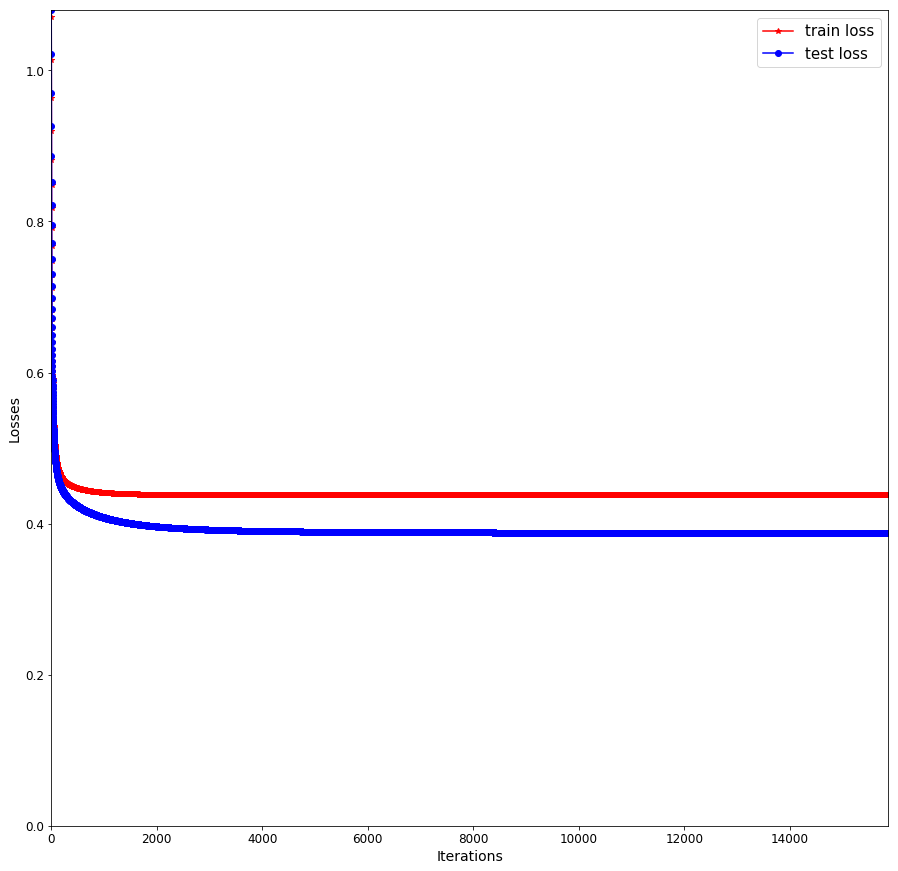

array([[-0.95365421,  0.19890539],
       [ 3.32865821,  0.51732794],
       [ 2.43067348,  3.21260979]])

In [462]:
theta_b = BGDWtihEarlyStopping(X_train, y_train, 3, 0.1, 100, False)
theta_b

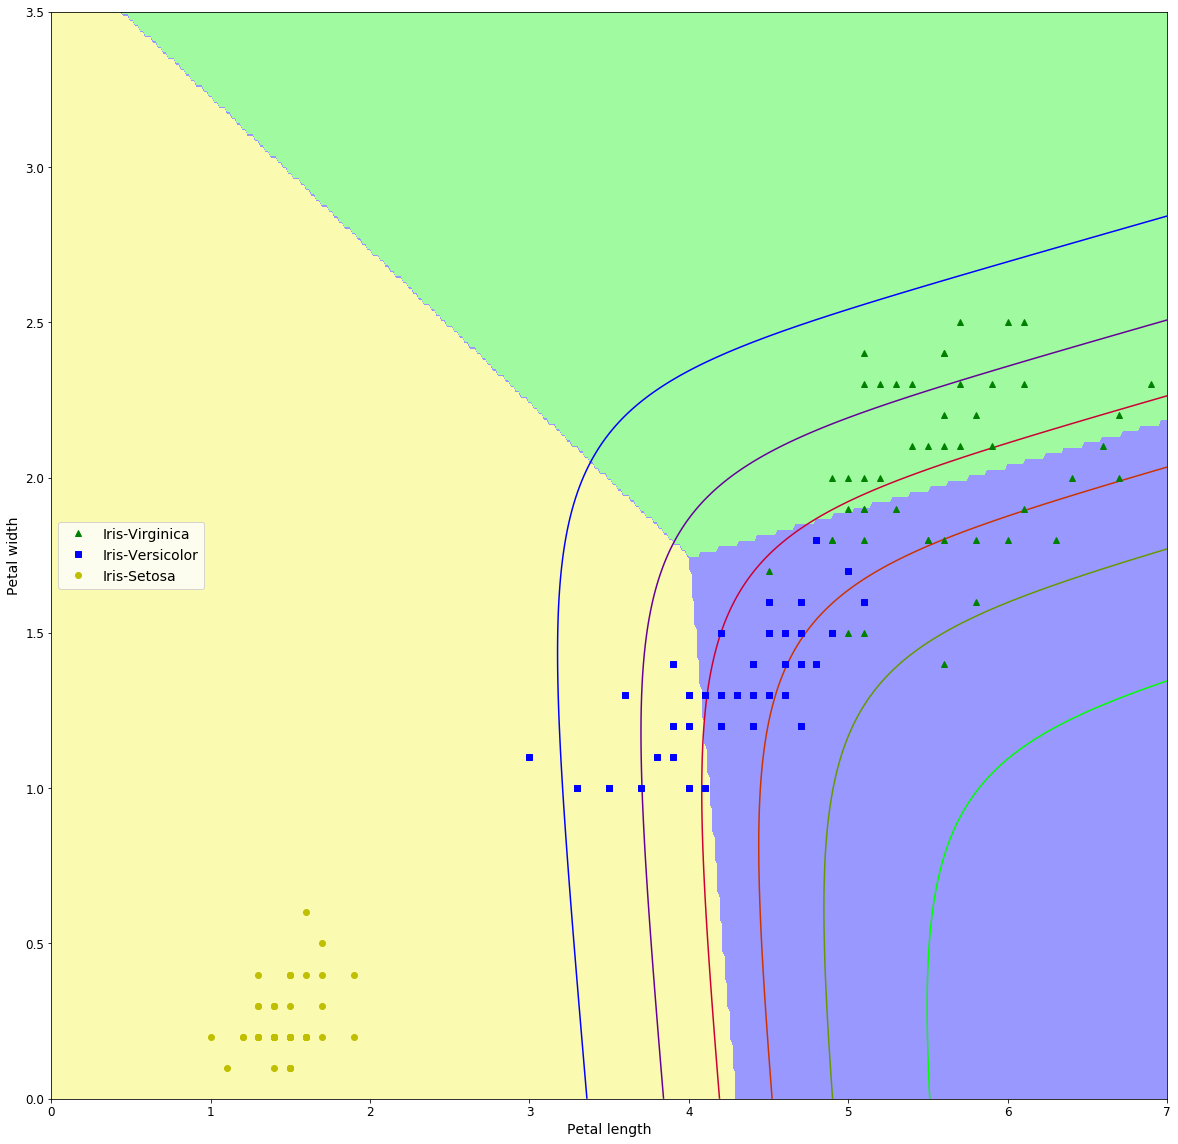

In [467]:
# std_X_test = StandardScaler().fit_transform(X_train)
# # std_X_test_b = np.concatenate([np.ones(std_X_test.shape[0]).reshape(-1, 1), std_X_test], 1)
# std_X_test_b = std_X_test

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


std_X_new = StandardScaler().fit_transform(X_new)
std_X_new_b = np.concatenate([np.ones(std_X_new.shape[0]).reshape(-1, 1), std_X_new], 1)
std_X_new_b = std_X_new

y_proba = SoftMax(std_X_new_b.dot(theta_b.T))
y_predict = np.argmax(y_proba, axis=1).reshape(-1)


zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(20, 20))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [458]:
X_test = X_train
y_test = y_train

In [464]:
std_X_test = StandardScaler().fit_transform(X_test)
std_X_test_b = np.concatenate([np.ones(std_X_test.shape[0]).reshape(-1, 1), std_X_test], 1)
std_X_test_b = std_X_test

y_pred_score = SoftMax(std_X_test_b.dot(theta_b.T))
y_pred = np.argmax(y_pred_score, axis=1).reshape(-1)

In [385]:
y_pred_score

array([[  5.02729551e-01,   4.97270448e-01,   1.38448058e-10],
       [  2.66423929e-19,   4.59552509e-01,   5.40447491e-01],
       [  1.27481126e-71,   4.02162279e-01,   5.97837721e-01],
       [  2.38667438e-05,   4.58385413e-01,   5.41590721e-01],
       [  6.90923906e-63,   3.47916290e-01,   6.52083710e-01],
       [  6.20761126e-49,   3.44608961e-01,   6.55391039e-01],
       [  4.84044761e-01,   4.93640887e-01,   2.23143524e-02],
       [  1.17830201e-43,   1.42990866e-01,   8.57009134e-01],
       [  6.27527830e-01,   3.72472170e-01,   1.51135281e-85],
       [  9.16806715e-23,   4.86323735e-01,   5.13676265e-01],
       [  3.32021931e-47,   4.61802918e-01,   5.38197082e-01],
       [  8.80984289e-01,   1.19015711e-01,   4.65916629e-70],
       [  5.57742232e-35,   3.41262524e-01,   6.58737476e-01],
       [  2.63757668e-52,   4.99226756e-01,   5.00773244e-01],
       [  5.84228560e-21,   4.97434030e-01,   5.02565970e-01],
       [  3.59335172e-47,   2.78128333e-01,   7.2187166

In [465]:
y_pred

array([1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2,
       2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2])

In [466]:
accuracy_score(y_test, y_pred)

0.73333333333333328